# Insurance Claims Fraud Detection Project

# Problem Statement:

Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

# Objective: 
    
    We have to build a predictive model that predicts if an insurance claim is fraudulent or not.

In [1]:
#Importing the necessary Libraries

# linear algebra
import numpy as np 

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')

# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.stats import norm

# Algorithms
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose
import pyfiglet

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,FunctionTransformer,power_transform
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
import scikitplot as skplt
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier.rocauc import roc_auc

from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

import pickle
import joblib

# Loading the Dataset

In [2]:
df=pd.read_csv('insurance.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Remarks: We see that our dataset consists of a total of 1000 rows and 40 columns. There are numerical data columns as well as categorical data columns in the dataset. Later, we have to convert the categorical columns to numerical to train our model. As we are supposed to predict the 'fraud_reported' column which is object data column so this makes it a Classification problem.

In [3]:
#checking the dimension of the dataset
df.shape

(1000, 40)

# Data Exploration/Analysis

In [4]:
#checking the first 5 entries of the dataset
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
#checking the last 5 entries of the dataset
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
#checking column names
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
#checking the datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Remarks: Here we can see that there are 2 float datatype columns, 17 numerical datatype columns and 21 object datatype columns present in our dataset.

In [8]:
#checking for null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Remarks: Except for the '_c39' column which is entirely empty, all other columns have no any missing values. Hence, we can drop '_c39' column.

In [9]:
#checking unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Remarks: From the above cell, we can see the number of unique values each of the columns have.

# Statistical Analysis

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


Remarks:

We can see all the columns except for '_c39' are having 1000 count which indicates it doesn't contain any missing values.

Mean is greater than median in all the columns which indicates that data is skewed.

Standard Deviation is higher in all features which indicates data is heavily spreaded.

Large difference between 75th percentile and max is present in 'umbrella_limit' column which indicates outliers may be there which we will be checking later.

# Data pre-processing:

In [11]:
def preprocess(df):
  df=df.copy()
  #Feature Engineering
  df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
  df['policy_bind_year']=df['policy_bind_date'].dt.year
  df['policy_bind_month']=df['policy_bind_date'].dt.month
  df['policy_bind_day']=df['policy_bind_date'].dt.day
  #Dropping columns
  df.drop(['_c39','policy_bind_date','incident_location','incident_date'],axis=1,inplace=True)
  return df

Remarks: In the above cell, we have separated the date object datatype columns into 3 columns for day, month and year; and we have also dropped columns that are not useful for our model prediction.

In [12]:
df=preprocess(df)
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_month,policy_bind_day
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,6510,13020,52080,Saab,92x,2004,Y,2014,10,17
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,780,3510,Mercedes,E400,2007,Y,2006,6,27
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,7700,3850,23100,Dodge,RAM,2007,N,2000,6,9
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,5,25
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1300,650,4550,Accura,RSX,2009,N,2014,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,17440,8720,61040,Honda,Accord,2006,N,1991,7,16
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,18080,18080,72320,Volkswagen,Passat,2015,N,2014,5,1
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,7500,7500,52500,Suburu,Impreza,1996,N,2003,2,17
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,5220,5220,36540,Audi,A5,1998,N,2011,11,18


# Exploratory Data Analysis(EDA)

# Univariate Analysis:

In [13]:
def countplot(x):
  plt.figure(figsize=(12,8))
  sns.countplot(x)
  plt.xticks(rotation=90,fontsize=14)
  plt.yticks(fontsize=14)
  return plt.show()

In [14]:
col=['authorities_contacted','auto_make','auto_model','collision_type','fraud_reported','incident_city','incident_severity','incident_state',
'incident_type','insured_education_level','insured_hobbies','insured_occupation','insured_relationship','insured_sex','police_report_available',
'policy_csl','policy_state','property_damage','policy_bind_year','policy_bind_month']

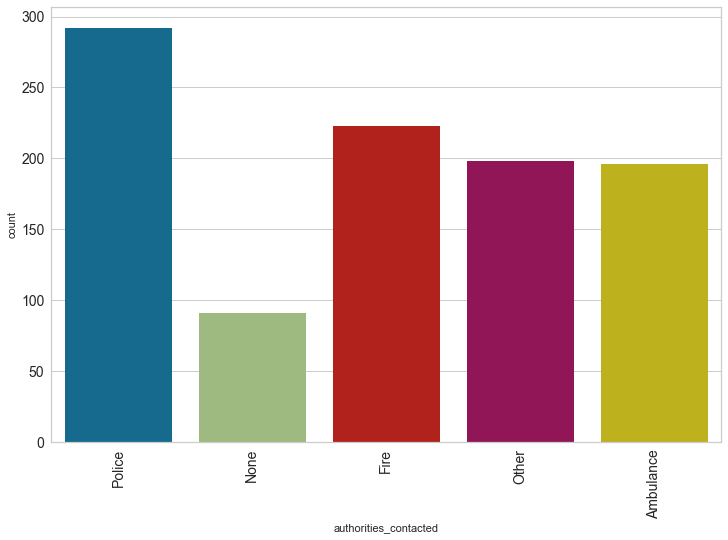

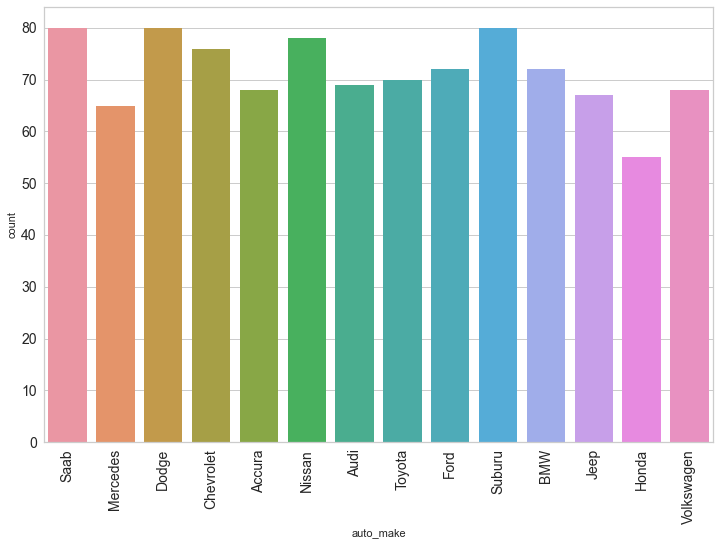

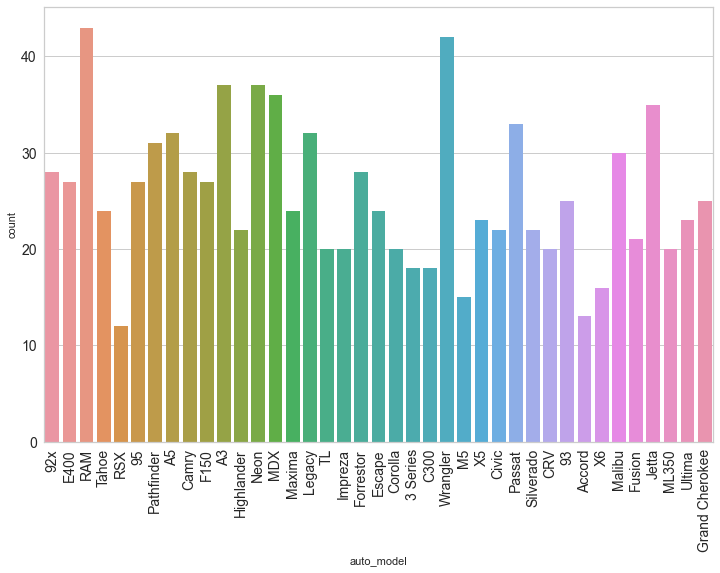

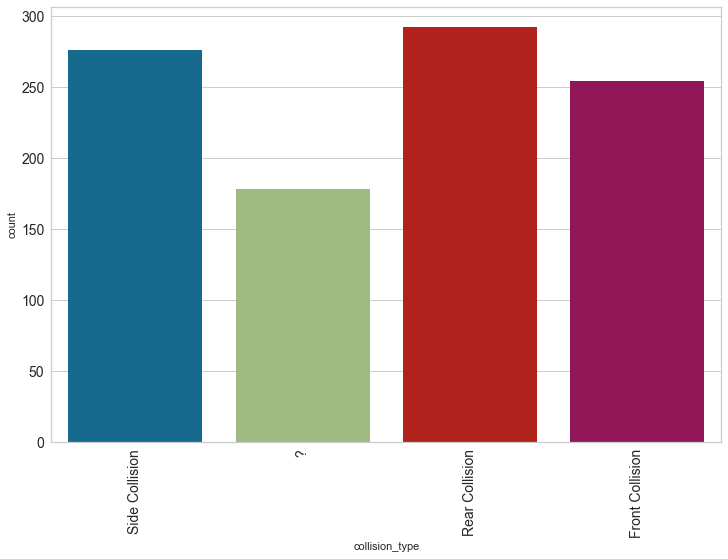

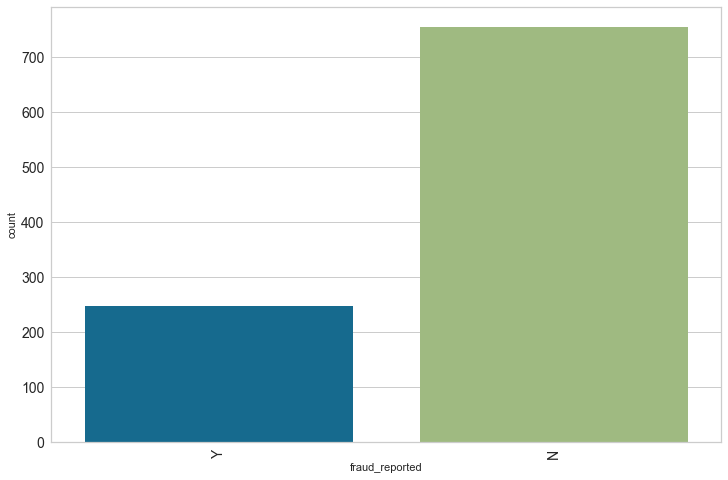

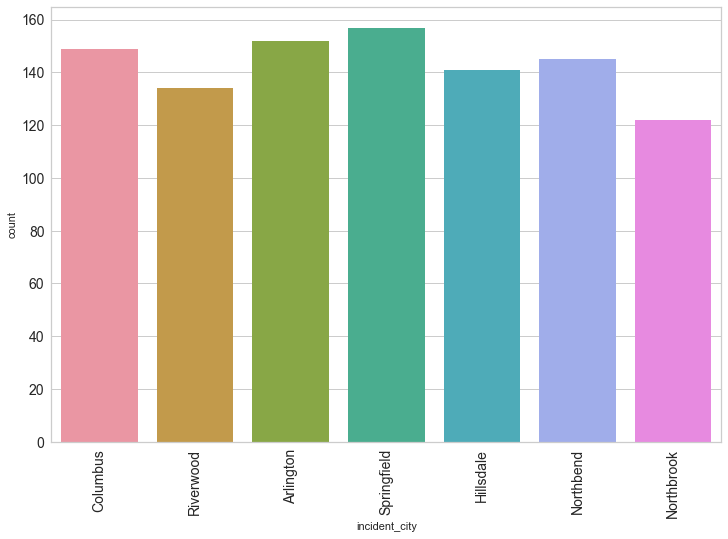

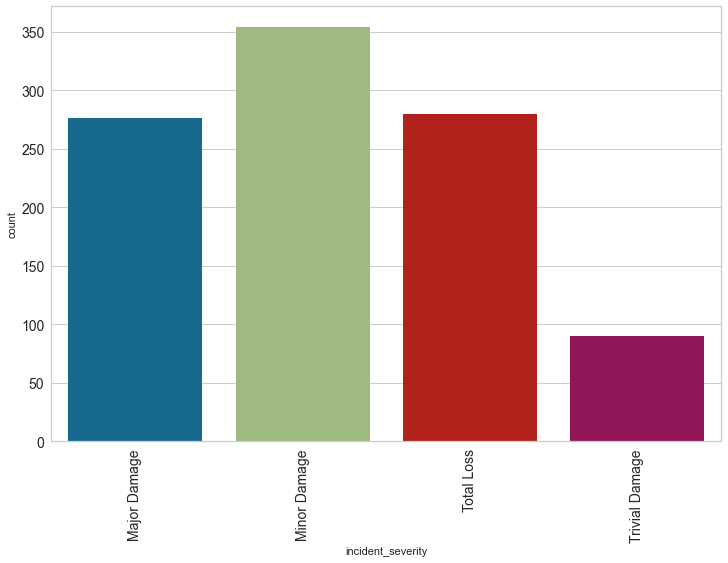

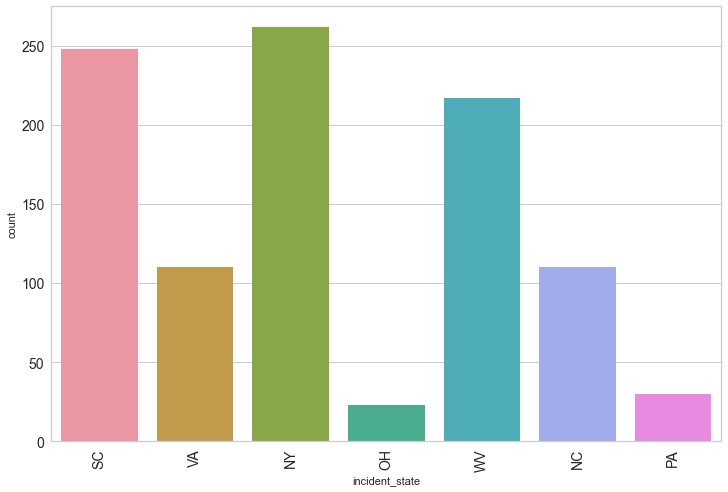

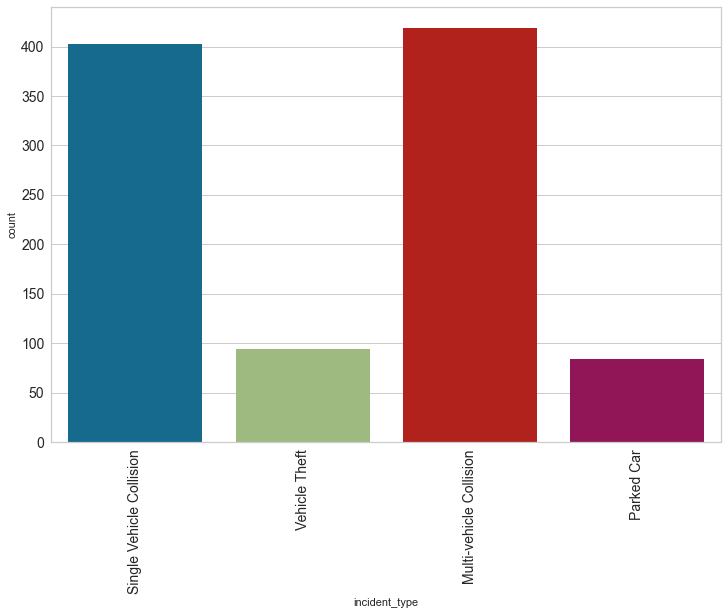

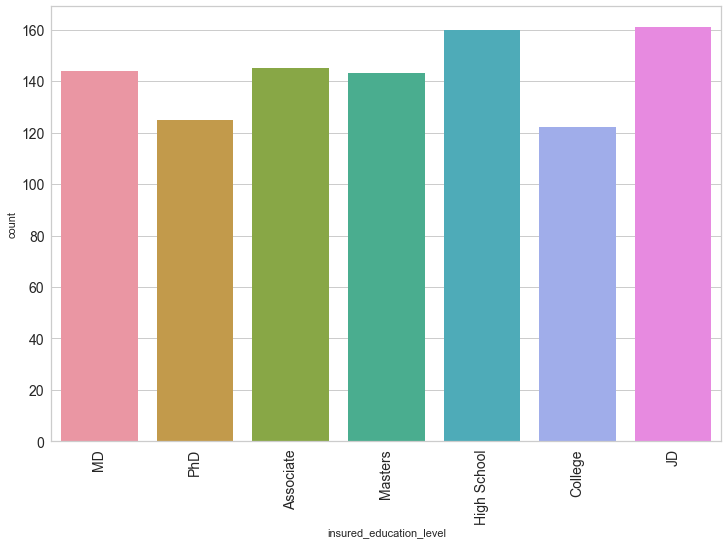

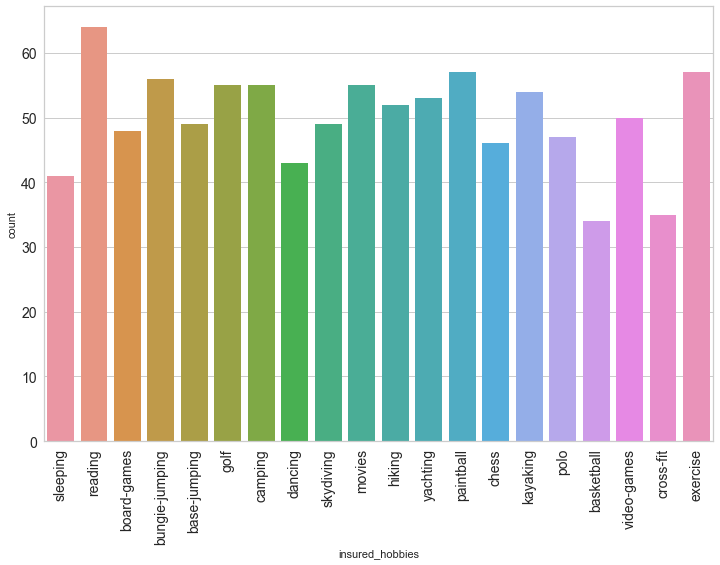

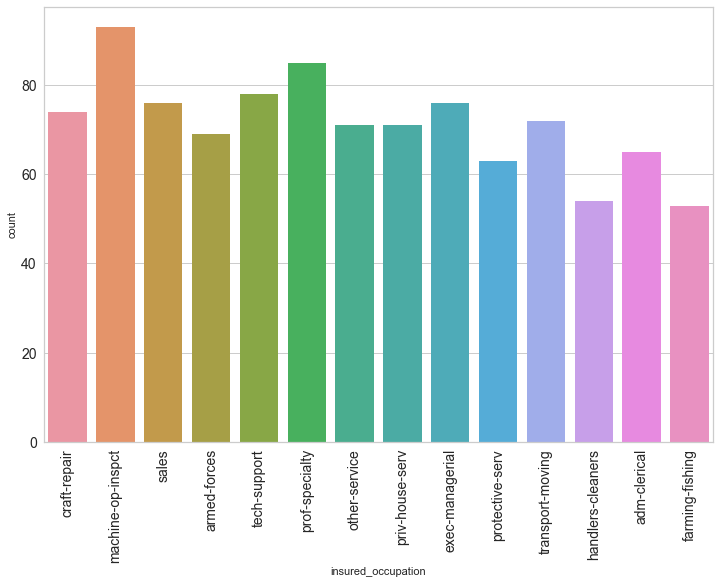

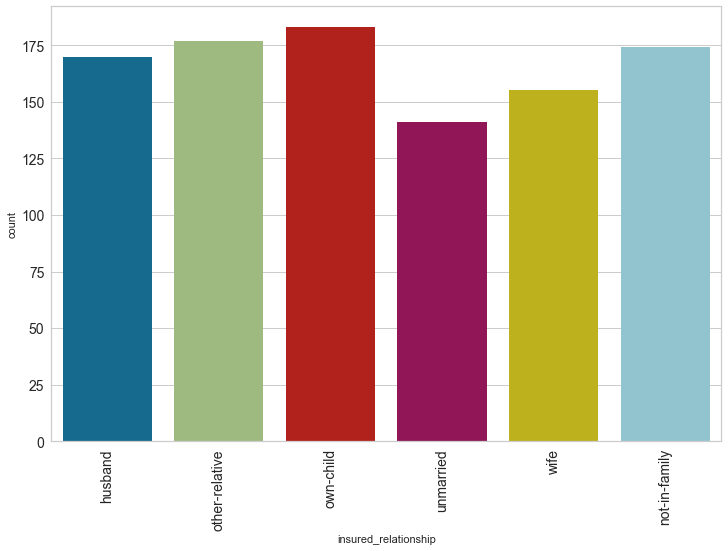

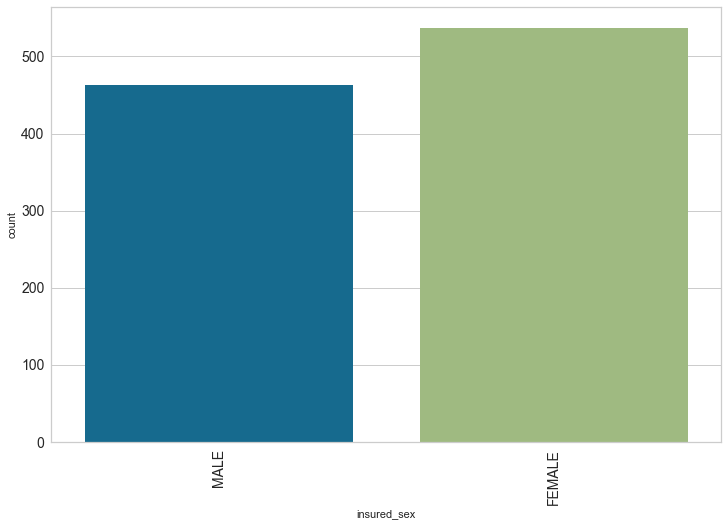

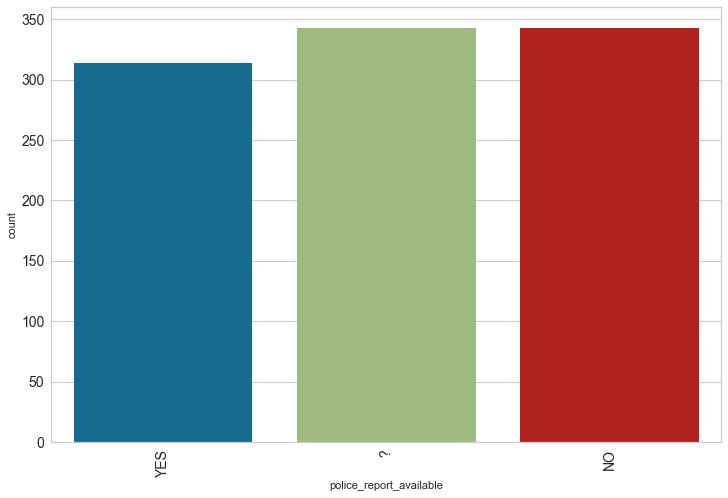

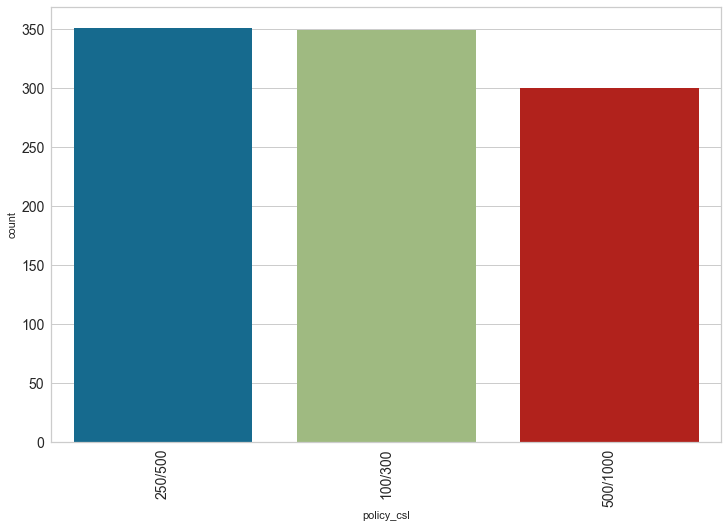

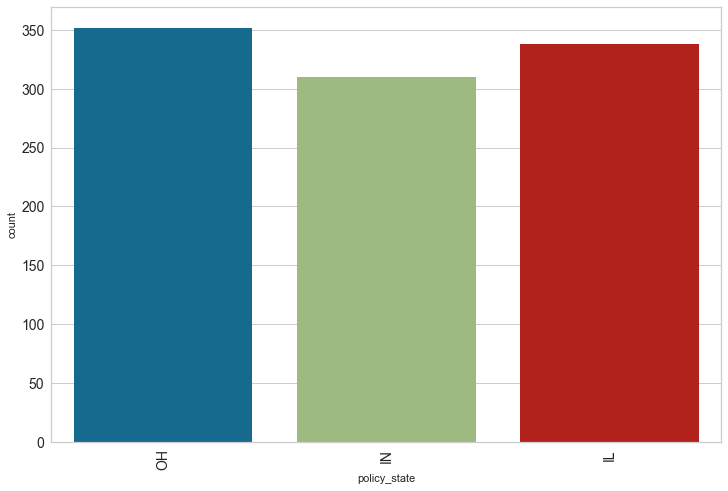

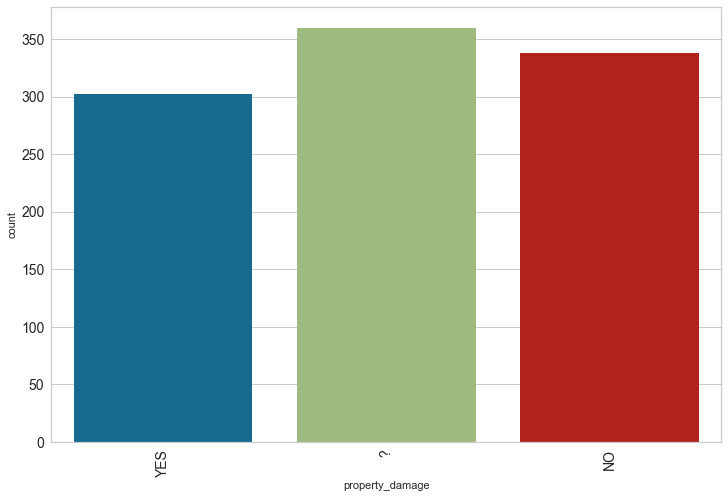

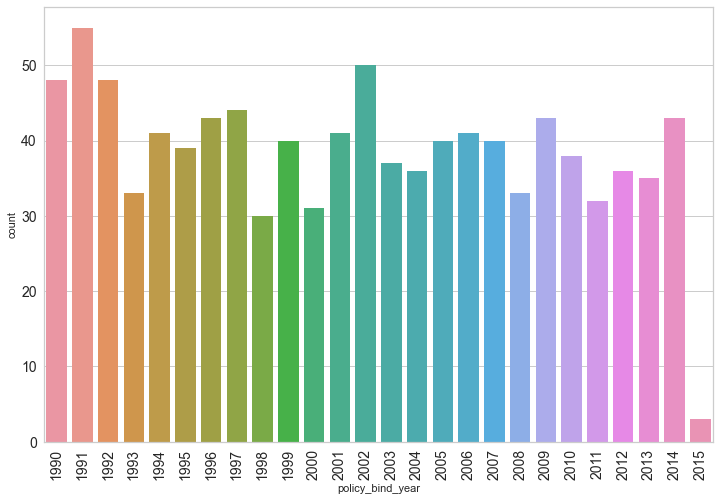

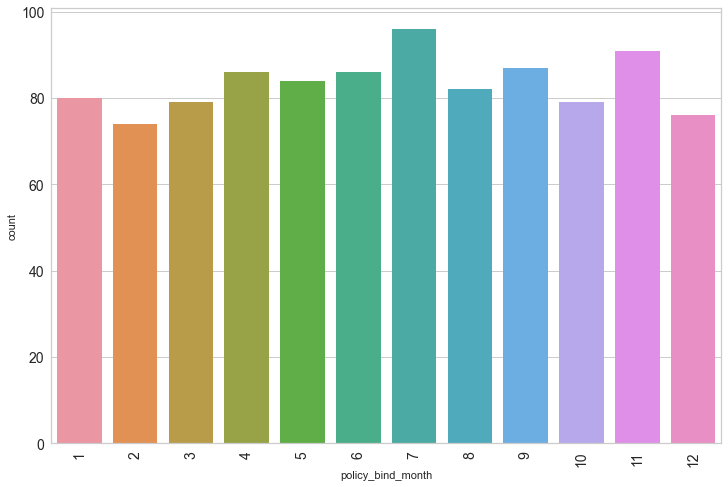

In [28]:
#checking countplot for the feature columns in col
for j in df[col]:
    countplot(df[j])

Observations:
    
1. From authorities_contacted plot, we see that police has the highest count which means people have contacted the police first.

2. From auto_make plot, we see that Suburu,Dodge,Saab has the highest count which means they make more vehicles, while honda and mercedes have less count.

3. From collision_type plot, we can see that rear collision has high count meaning people damage their vehicles probably from back side than front side.

4. From auto_model plot, we see that the vehicle models Wrangler and RAM has the highest count while RSX has the lowest count. 

5. From Fraud_reported plot, we see that No has high count while yes have less count which means less number of frauds have been reported.

6. From incident_city plot, we see that Springfield has high count indicating that in Springfield there are high chances of getting into an accident and Northbrook has less count indicating there are less chances of accident happening.

7. From incident_severity plot, we see that  Minor damange has high count indicating mostly people claim insurance for minor damage while total loss and major damage has same count indicating that people also goes for these two kind for insurance claim.

8. From incident_state plot, We see that Newyork has the highest count means mostly accident happens there only and Ohio has the least count as comapre to all which indicates that Ohio has very less chance of accident happening.

9. From incident type plot, we can see that Multi-vehicle Collision and Single-vehicle Collision has the highest count that indicates that mostly accident happened between multiple vehicles and with single vehicle. While very less accident happened with parked cars.

10. From insured_education_level plot, we see that JD and High school has almost same count which indicates that most of the people who claim insurance possesses these educational qualifications.

11. From insured_hobbies plot, we see reading was the most popular among the people claiming insurance.

12. From insured_occupation plot, we see that machine-op-inspct occupation has the high count while people who have farming-fishing occupation has made less insurance claim.

13. From insured_relationship plot, we see that own-child has high count indicating most of the people who have claimed insurance have child while un-married has the least count.

14. From insured_sex plot, we see that females have made more insurance claim than males.

15. From police_report_availabe plot, we can say that No has high count probably because less people were able to produce genuine reports claiming insurance.

16. From policy_cls plot, we can see that 250/500 and 100/300 has same highest count while 500/100 has less count.

17. From policy_state plot, we can see that IN has low count while IL and OH has almost same high count.

18. From property damage plot, ? and No has high count while yes has less count.

19. From policy_bind_year plot, we can see that most of the people have taken policy in 1991 and 2002 while only few people have taken policy in 2015.

20. From policy_bind_month plot, we can see that most of the people have taken policy in the month of July and November while the least number of policy was taken in February.

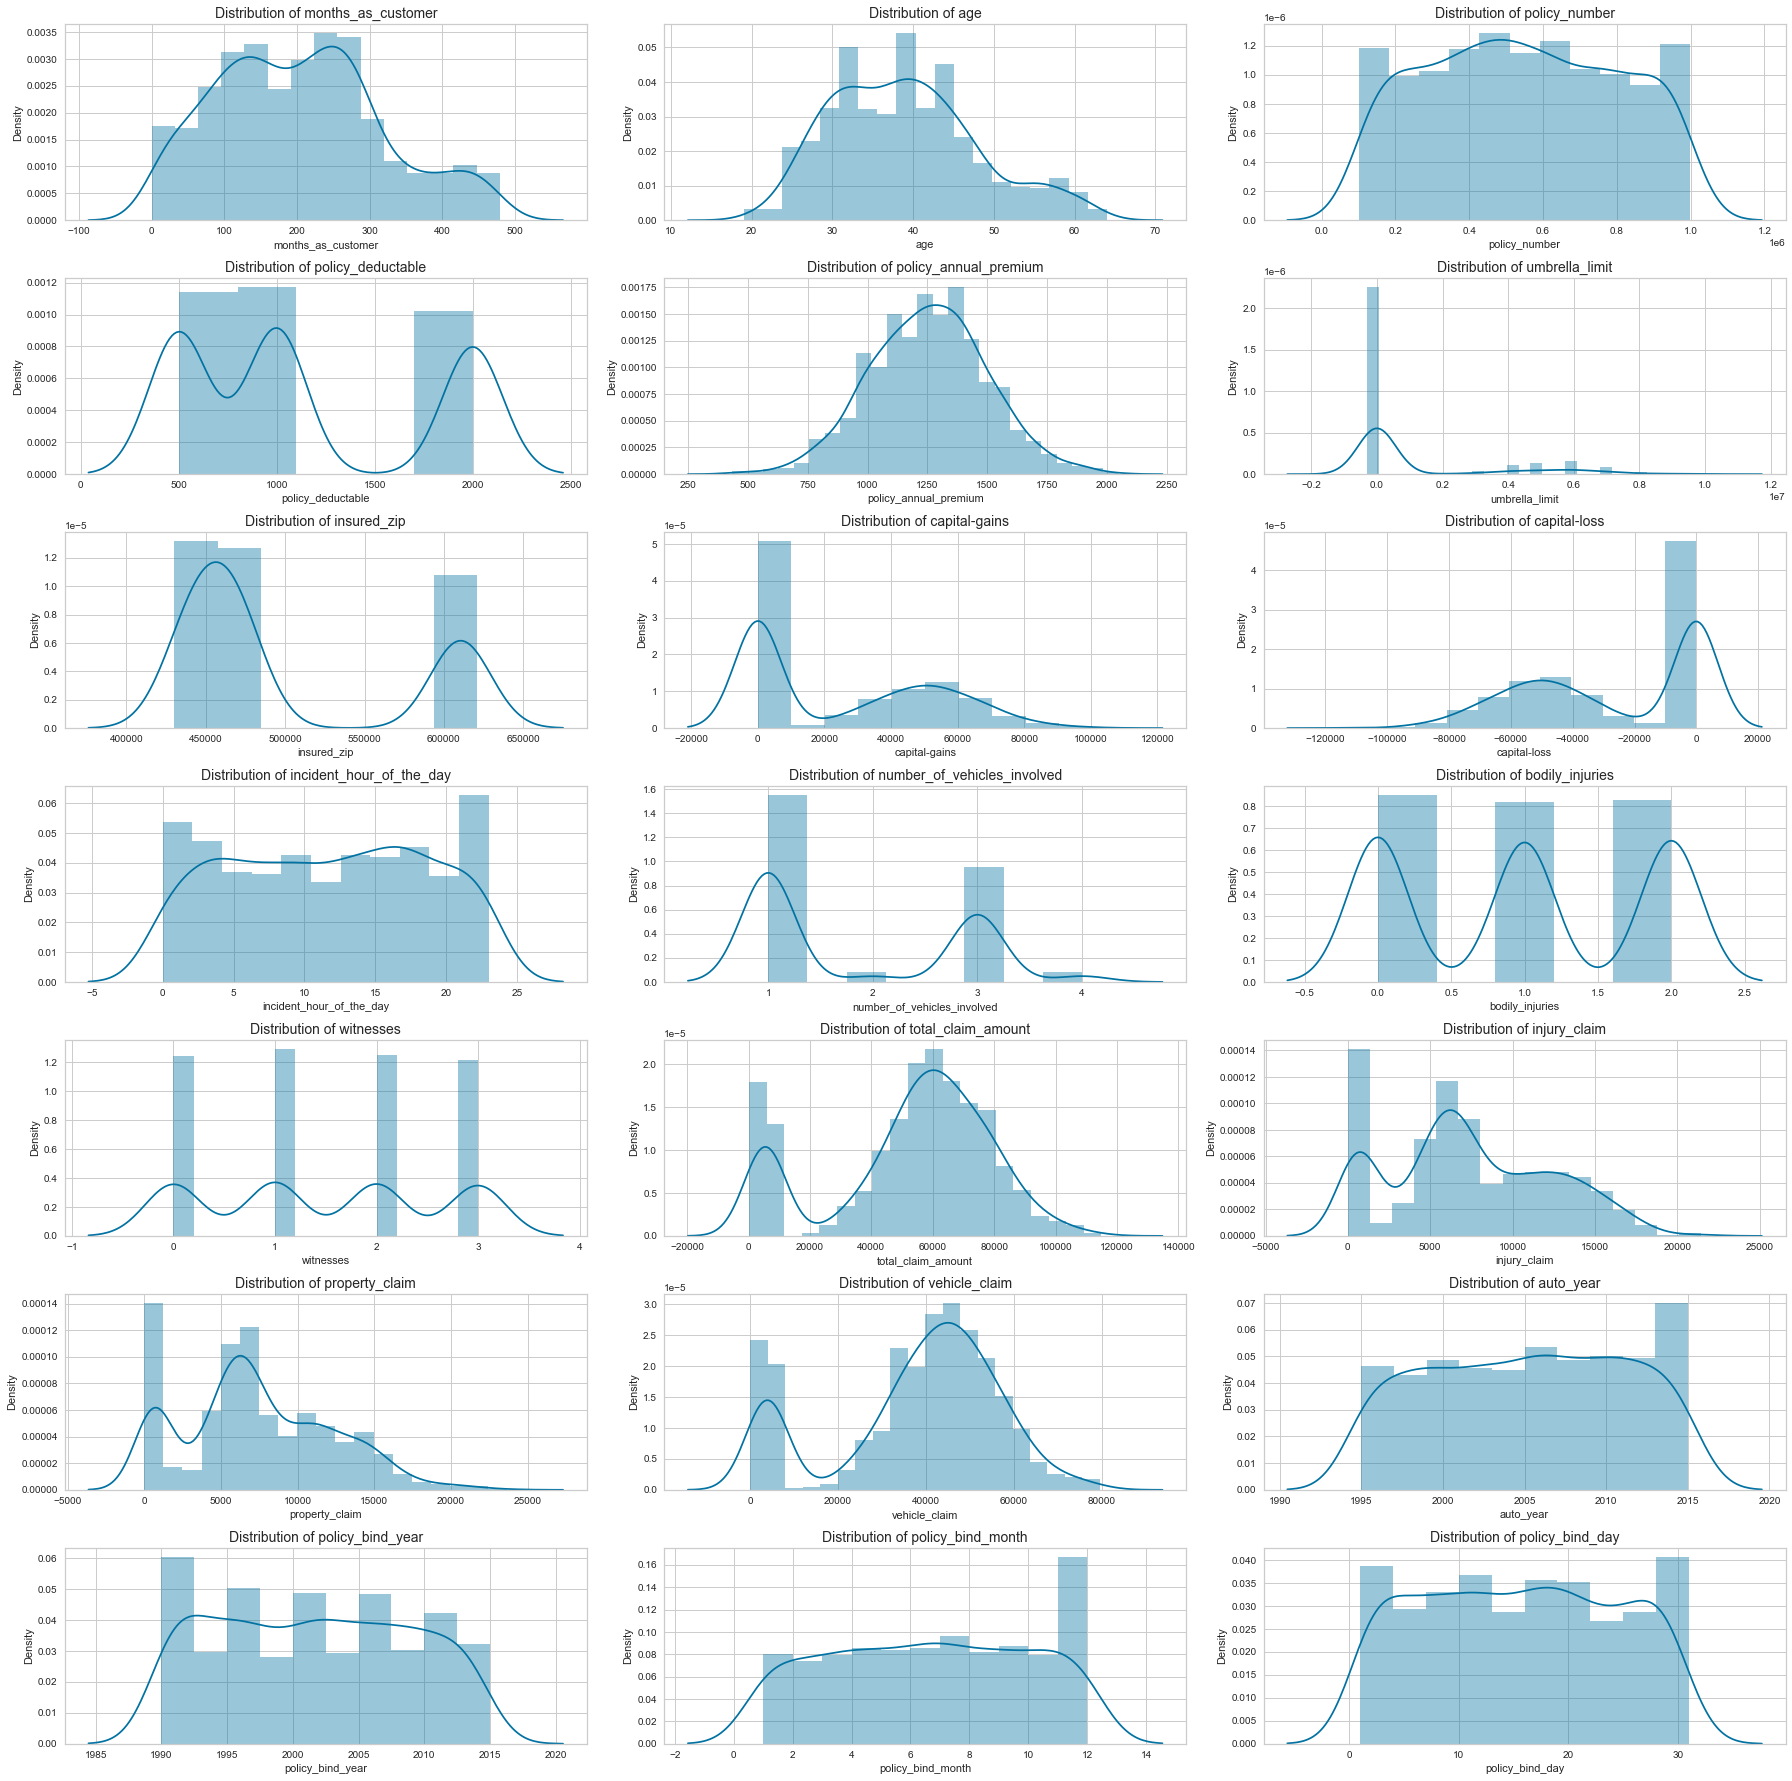

In [29]:
#checking the distribution plot for the feature columns in col1
col1=['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'policy_bind_year', 'policy_bind_month',
       'policy_bind_day']

plt.figure(figsize=(25,35))
for i in range(len(col1)):
  plt.subplot(10,3,i+1)
  plt.title(f"Distribution of {col1[i]}",fontsize=14)
  sns.distplot(df[col1[i]])
  plt.tight_layout()

Observation:

1. From months_as_customer plot, we can say that most people lies in between 0-100 and there are less no.of people who lies in 300-500 who are loyal customers.

2. From distribution of age plot, we can say that mostly people lies between 30-45 and less people in between 50-60.

3. From policy_annual_premium plot, we see that data is normally distributed.

4. From policy_deductable plot, we can say that the value is between 500-1000 and 17000-20000.

5. From capital_gain plot, we can see that 0-10000 has high peak and from capital_loss plot, 0-10000 has high peak while rest of the distribution are same for both the features.

6. From total_claim_amount plot, we see that 0-10000 has high peak and rest of all values are normally distributed.

7. From distribution of property claim plot, we can say that mostly people have claim between 0-1000 values.

8. From distribution of vehicle claim plot, we can say that there are many people who claim for 0-10000 values and rest of the value has normal distribution.

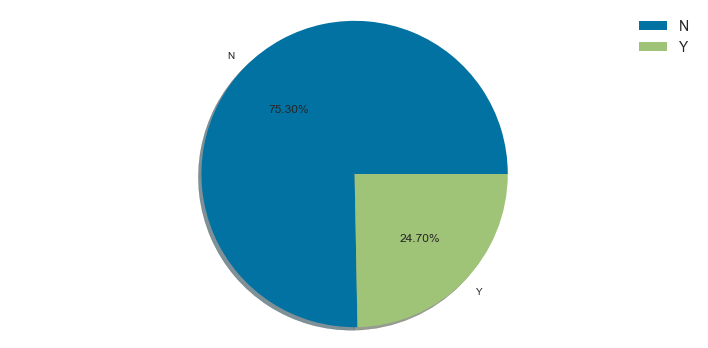

Categorical feature column: fraud_reported


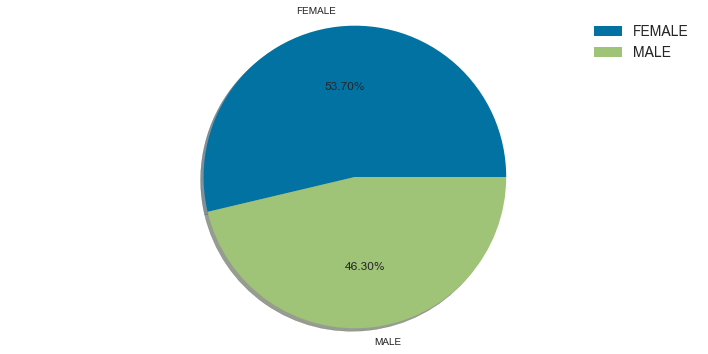

Categorical feature column: insured_sex


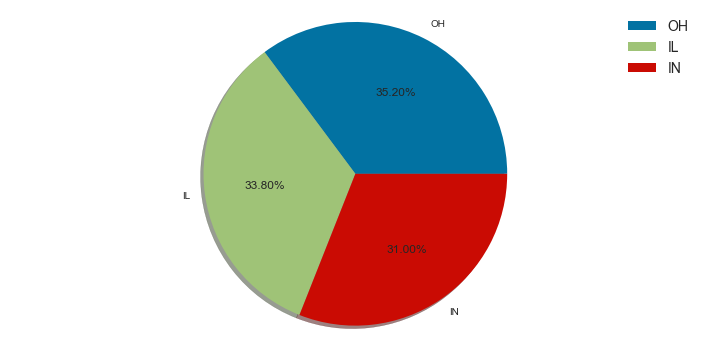

Categorical feature column: policy_state


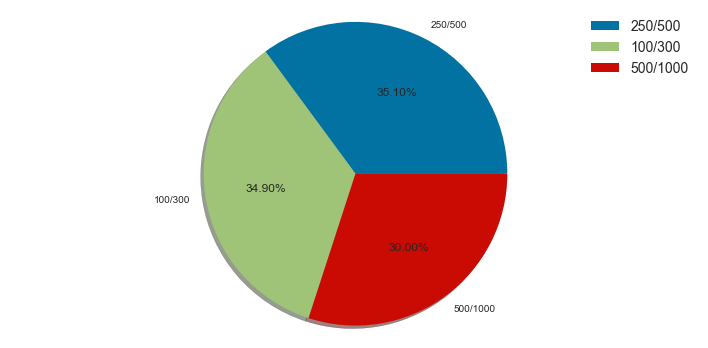

Categorical feature column: policy_csl


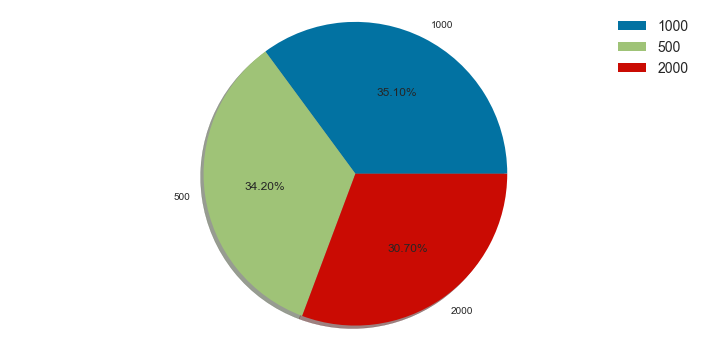

Categorical feature column: policy_deductable


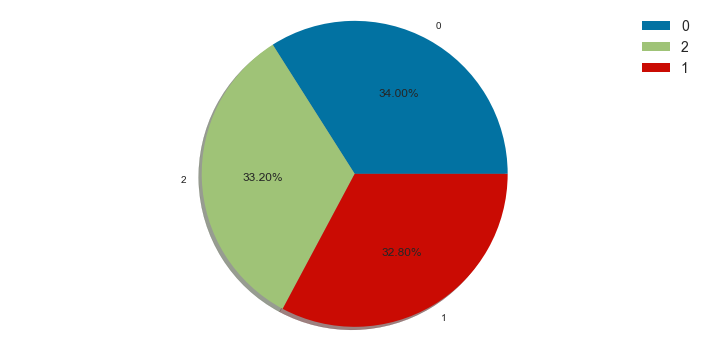

Categorical feature column: bodily_injuries


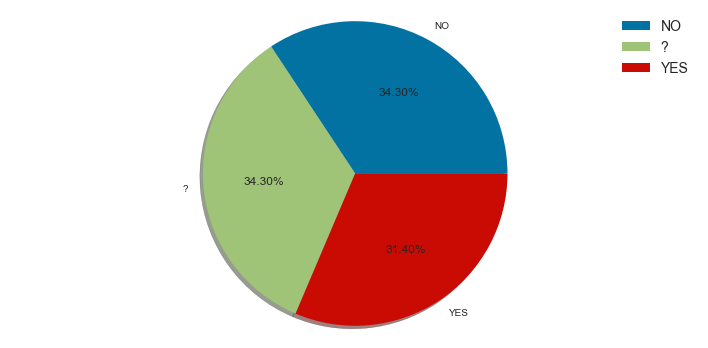

Categorical feature column: police_report_available


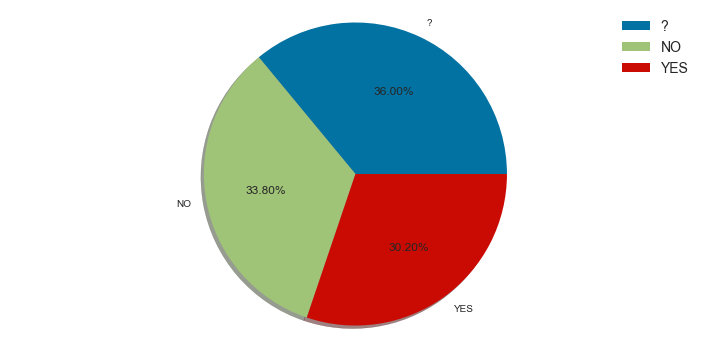

Categorical feature column: property_damage


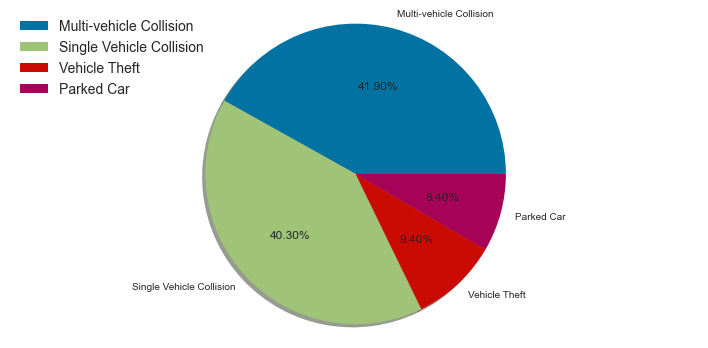

Categorical feature column: incident_type


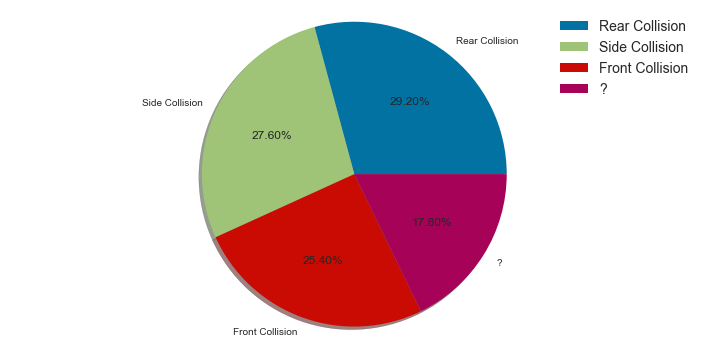

Categorical feature column: collision_type


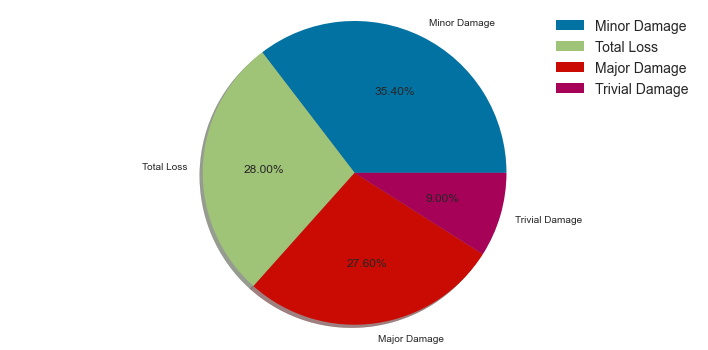

Categorical feature column: incident_severity


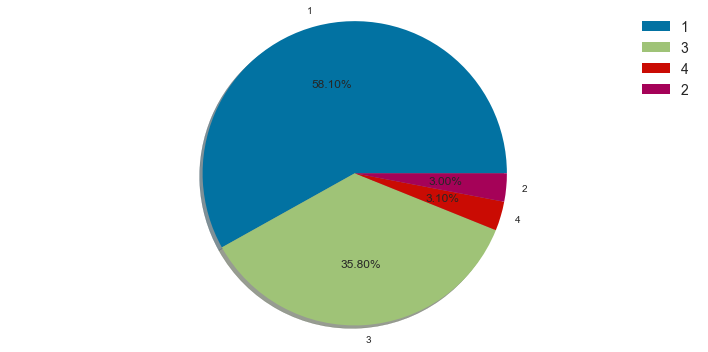

Categorical feature column: number_of_vehicles_involved


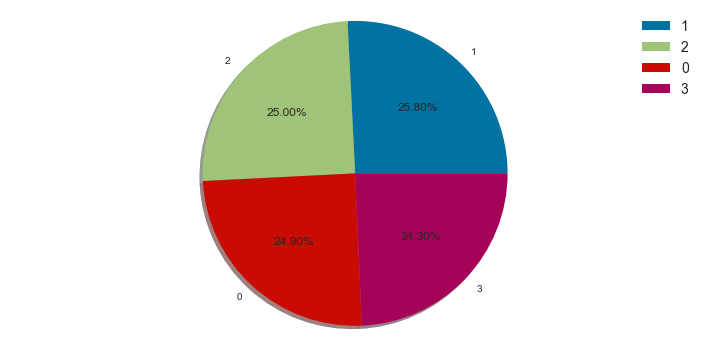

Categorical feature column: witnesses


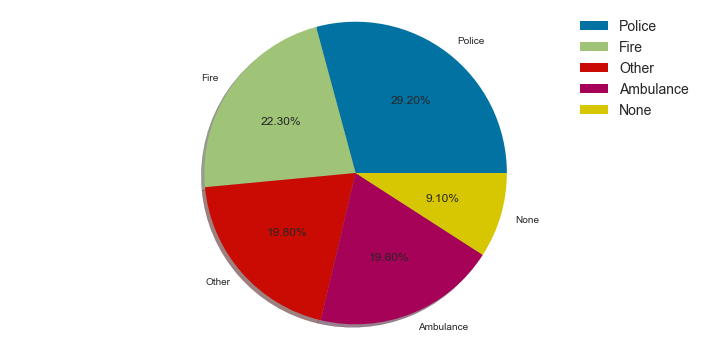

Categorical feature column: authorities_contacted


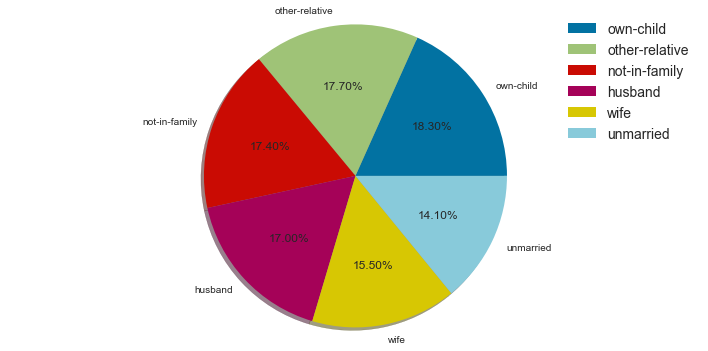

Categorical feature column: insured_relationship


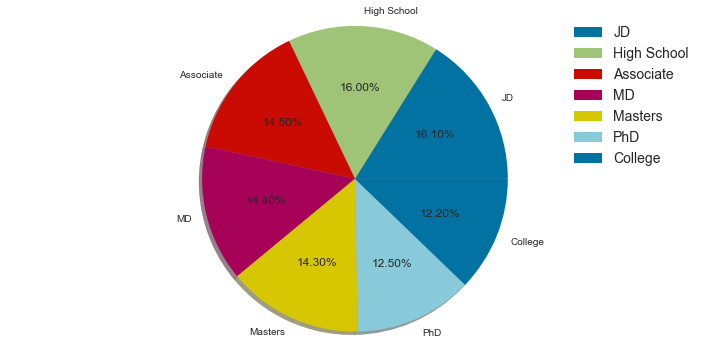

Categorical feature column: insured_education_level


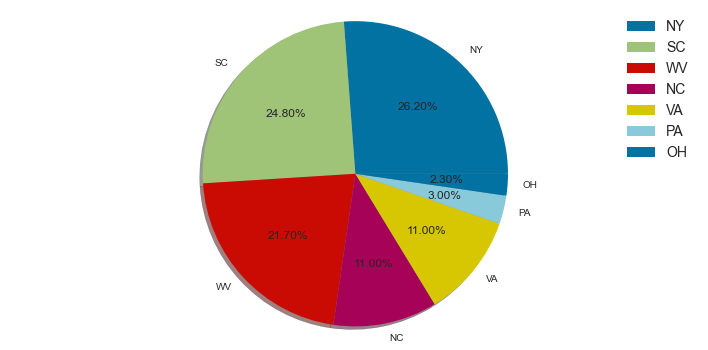

Categorical feature column: incident_state


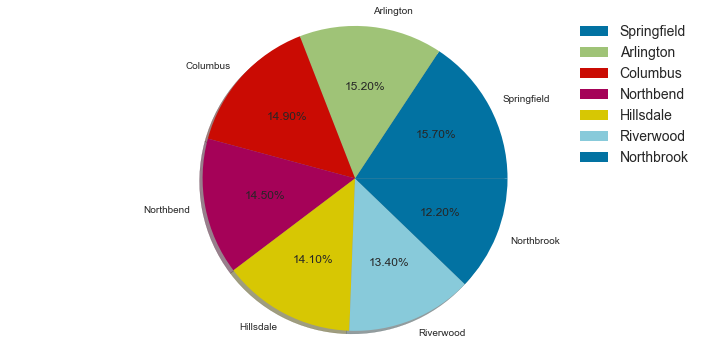

Categorical feature column: incident_city


In [15]:
#Plotting pie-diagram for the categorical feature columns in col2
def pie_diagram(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

col2 = ['fraud_reported', 'insured_sex', 'policy_state', 'policy_csl', 'policy_deductable', 'bodily_injuries',
        'police_report_available', 'property_damage', 'incident_type', 'collision_type', 'incident_severity',
        'number_of_vehicles_involved', 'witnesses', 'authorities_contacted', 'insured_relationship',
        'insured_education_level', 'incident_state', 'incident_city']

for i in df[col2]:
    pie_diagram(df[i])
    print(f"Categorical feature column:", i)

Observations: In the above cell, we have generated pie charts for the categorical columns which shows the pecentage of data that is distributed in the different unique values that each column contains. Here we can see that less number of data cover the yes portion of fraud reported and since this is our target label it indicates towards the problem of class imbalance as well. so later on we will balanced it.

# Bivariate Analysis:

Text(0.5, 1.0, 'Total claim amount and Vehicle claim vs auto_year')

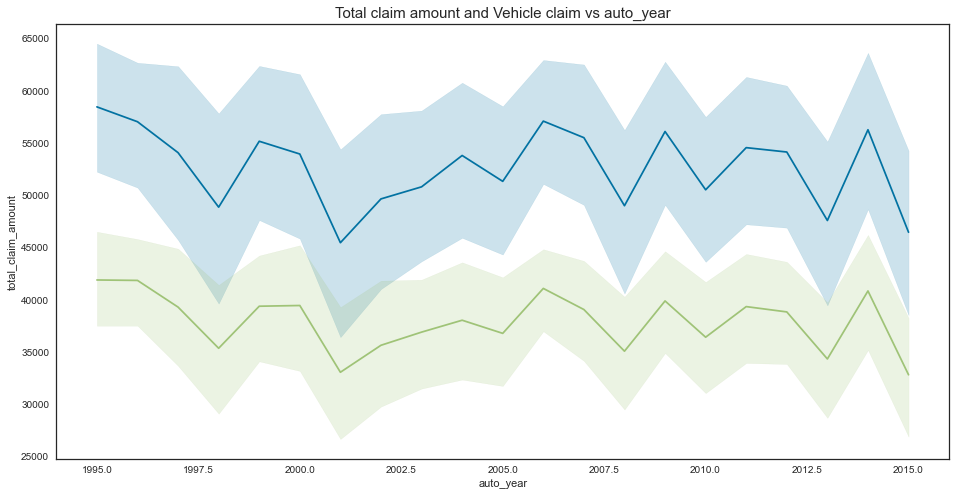

In [32]:
#checking lineplot
plt.figure(figsize=(16,8))
sns.lineplot(x='auto_year',y='total_claim_amount',data=df)
sns.lineplot(x='auto_year',y='vehicle_claim',data=df)
plt.title("Total claim amount and Vehicle claim vs auto_year",fontsize=15)

Remarks: From the above plot, we see that total claim amount and vehicle claim have same kind of distribution but there is a difference in values i.e., total claim amount has high value count than vehicle claim.

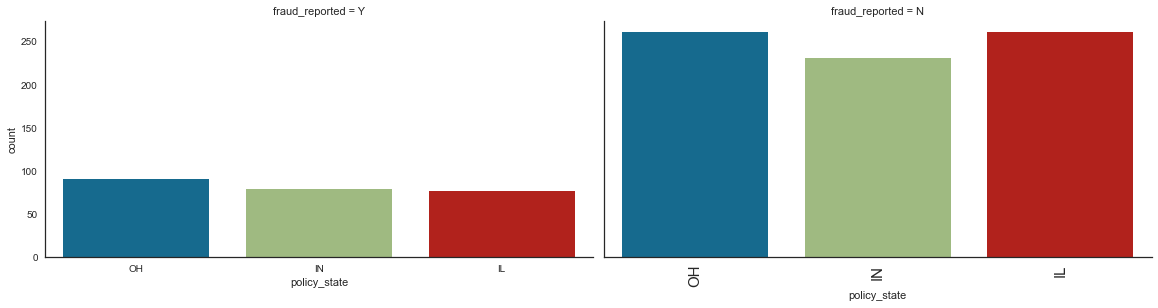

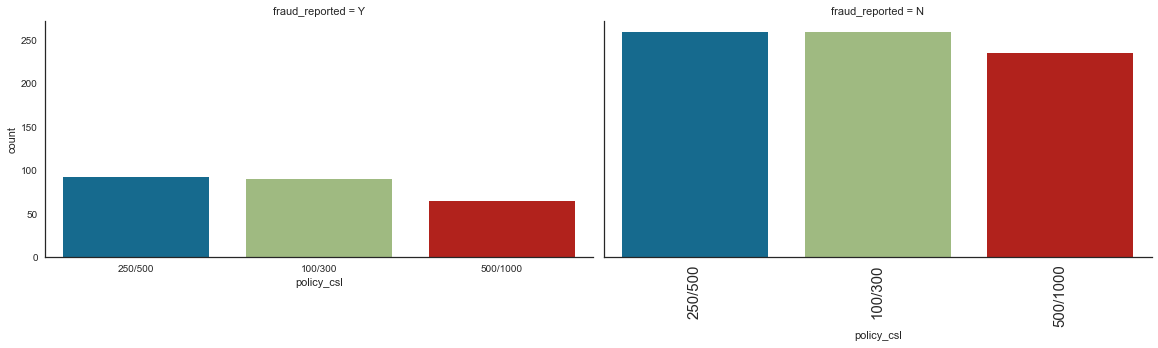

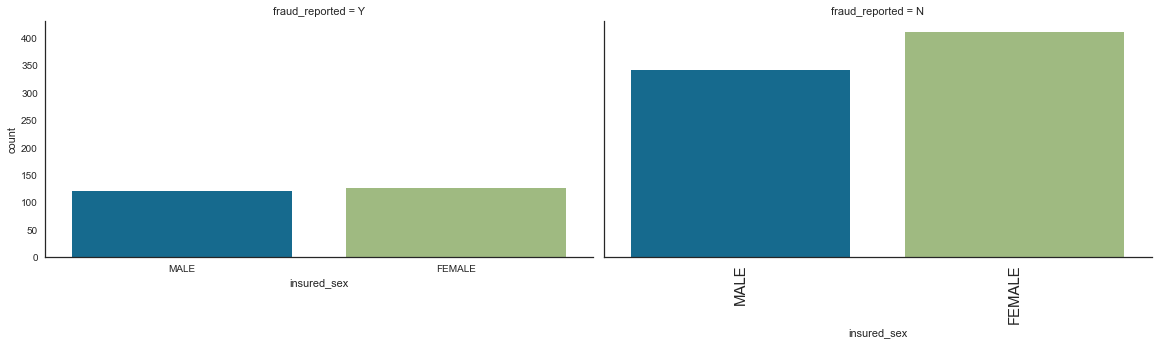

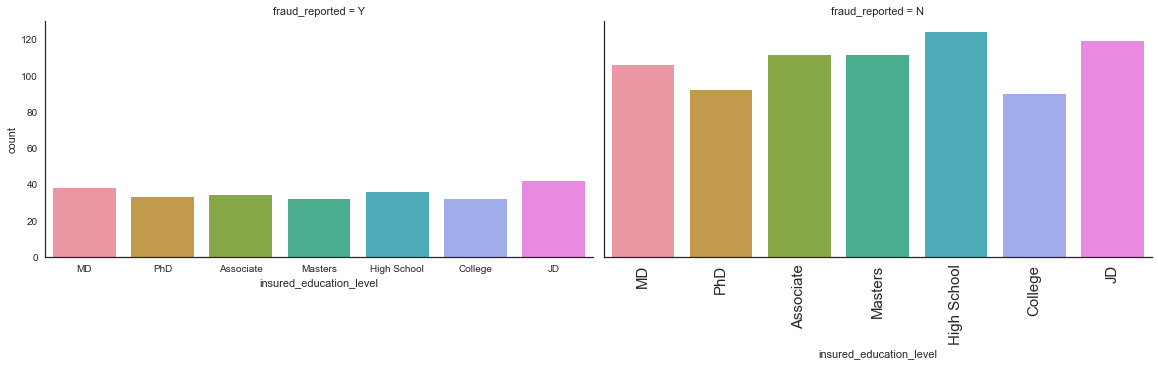

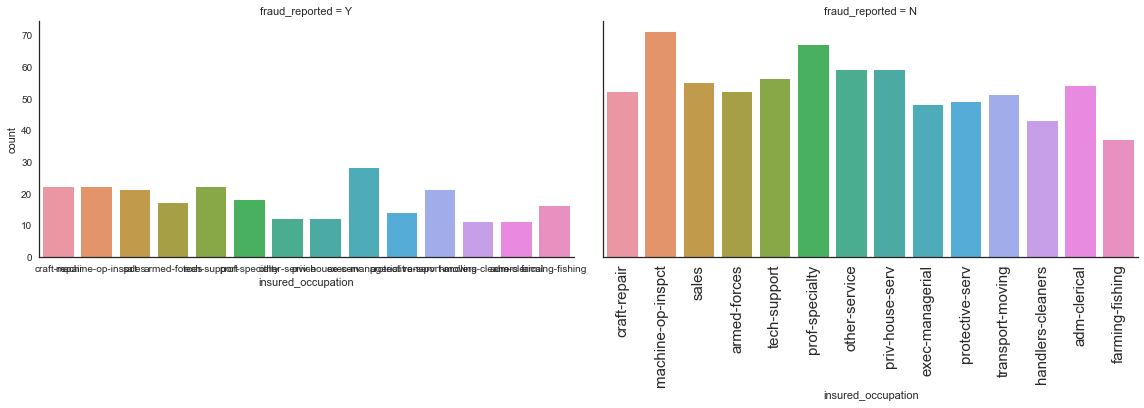

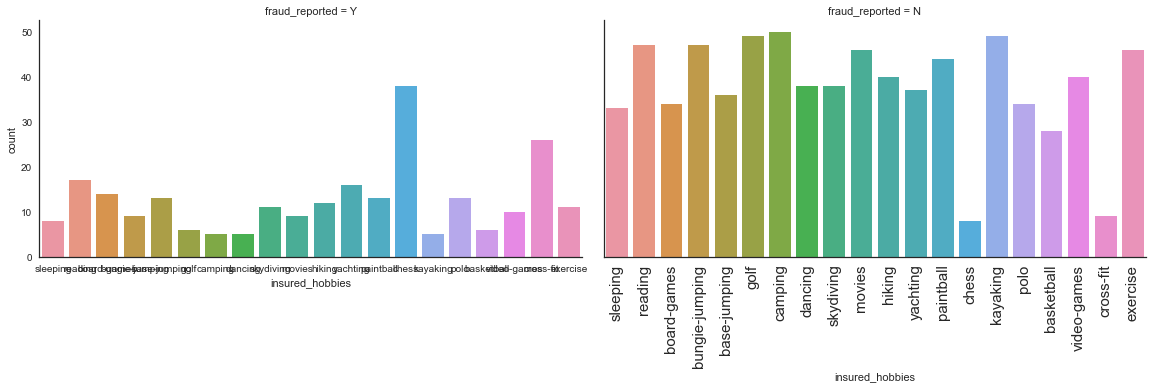

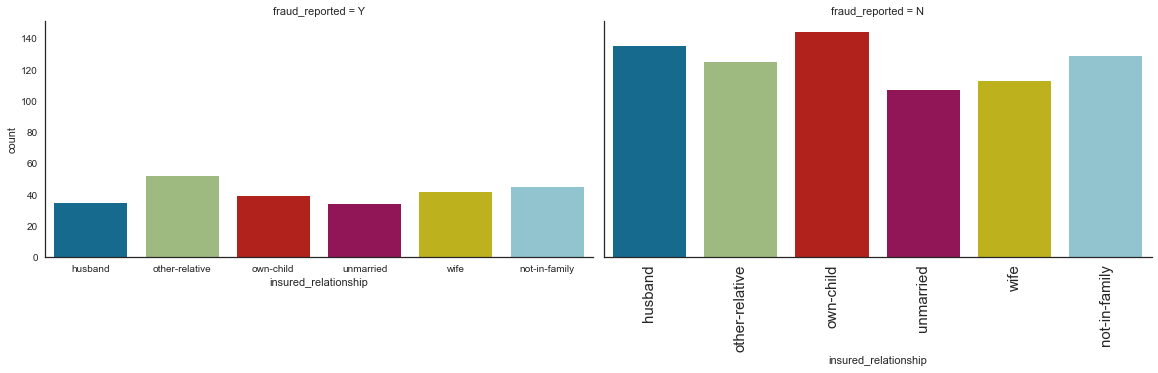

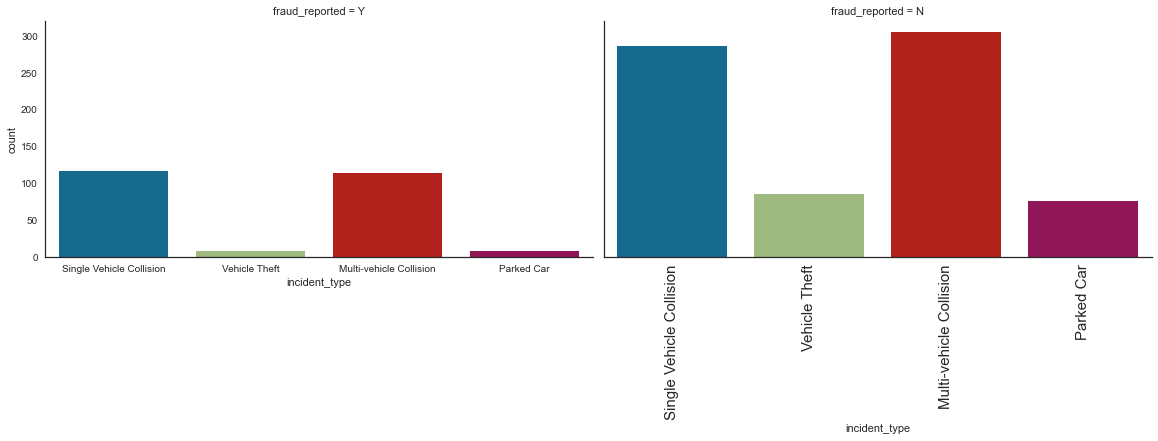

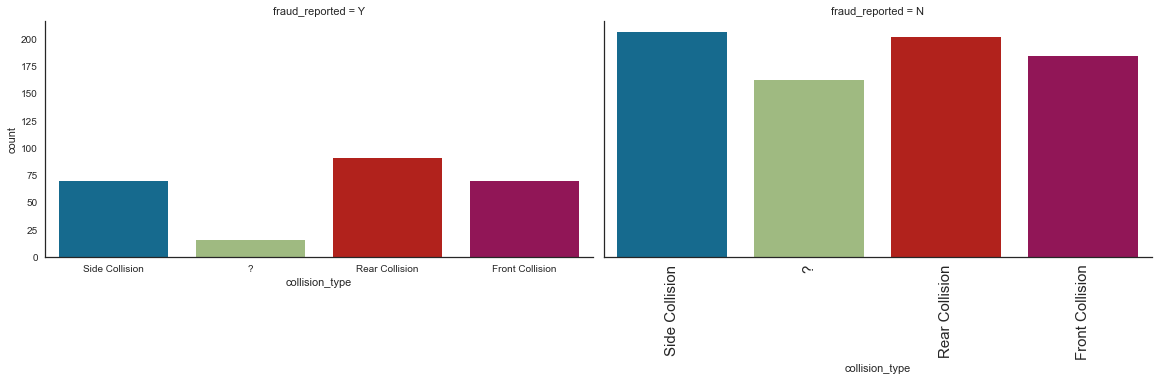

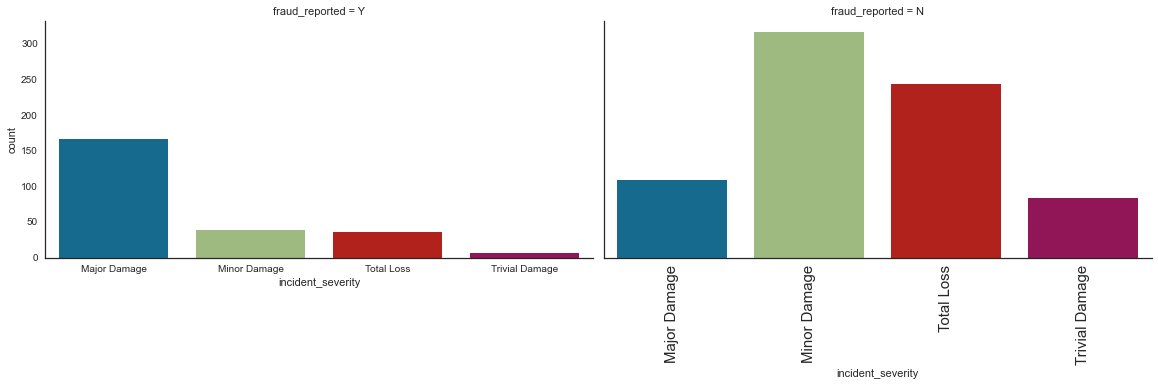

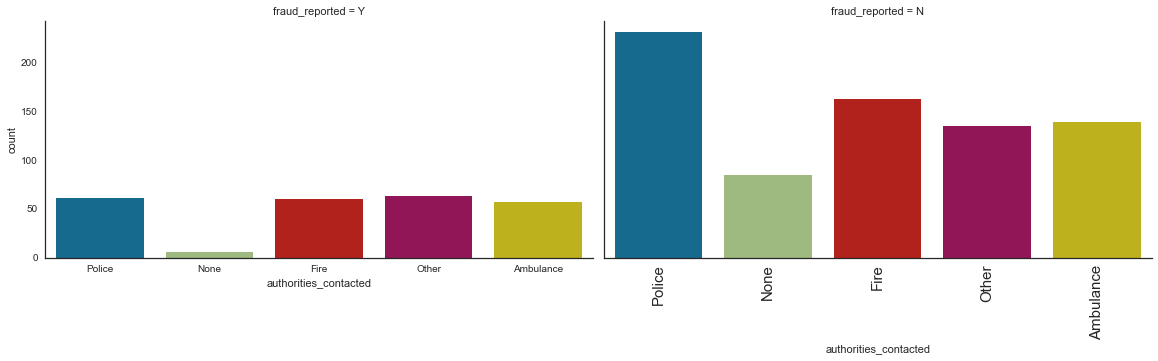

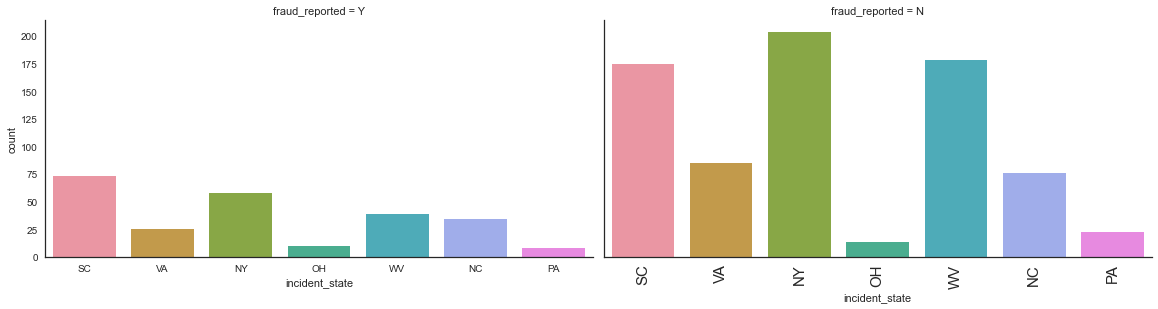

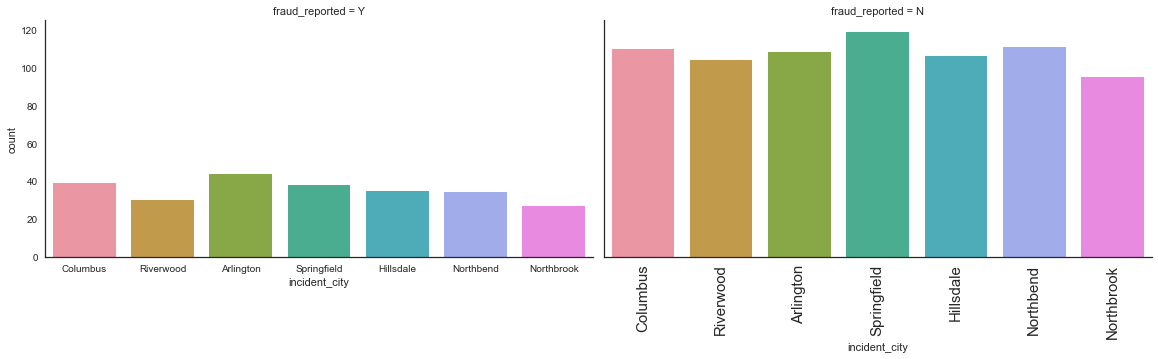

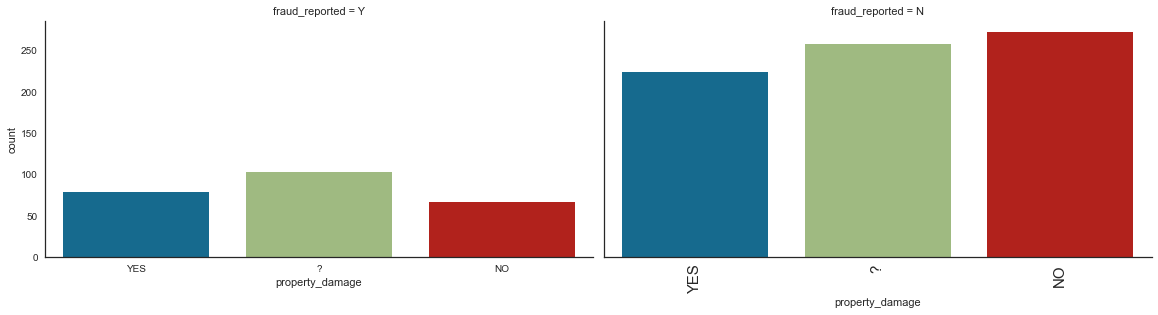

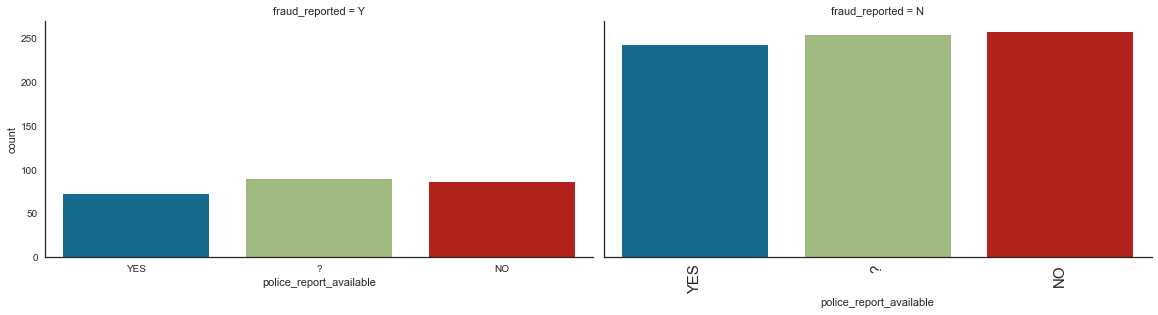

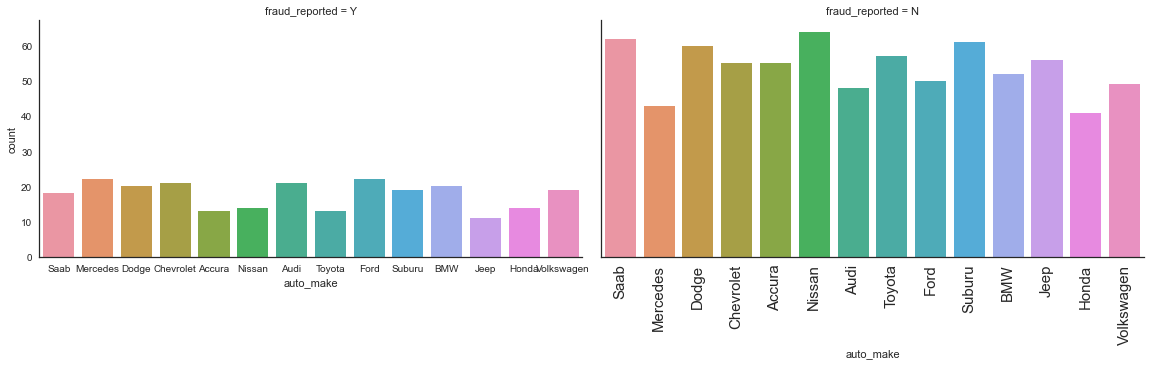

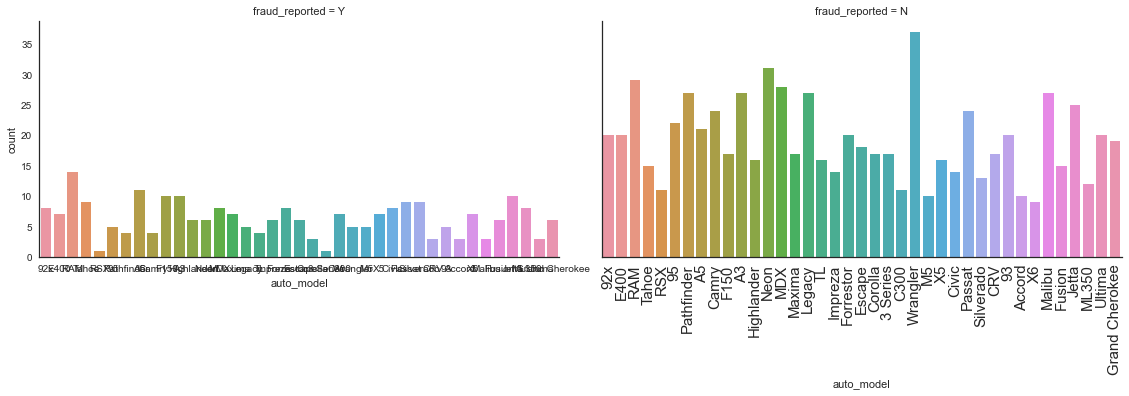

In [34]:
df1=df.select_dtypes(include='object')

new_df=list(df1.columns)
new_list=new_df
new_df.remove('fraud_reported')
for col in new_list:
  sns.catplot(x=col,col='fraud_reported',data=df1,kind='count',height=4,aspect=2)
  plt.xticks(rotation=90,fontsize=15)

Observations:
    
1. From policy_state plot, we see that majority of people who claimed for fraud insurance belonged to OH, and also the highest number of people that haven't reported fraud were Oh and IL.

2. Majority of People who claim fraud have equal count for male and female.

3. Majority of People who claimed fraud have hobbies like playing chess.

4. Majority of people who claimed fraud have relationship status as other-relative.

5. Majority of people who claimed fraud have incident_type status as single and multi-vehicle collision.

6. Majority of people who claimed fraud have collision_type status as rear collision.

7. Majority of People who claimed fraud have incident_severity status as major damage and very less people who have status as trivial damage.

8. Majority of People who claimed fraud have incident_state SC.

9. Majority of People who claimed fraud have incident_city as Arlington.

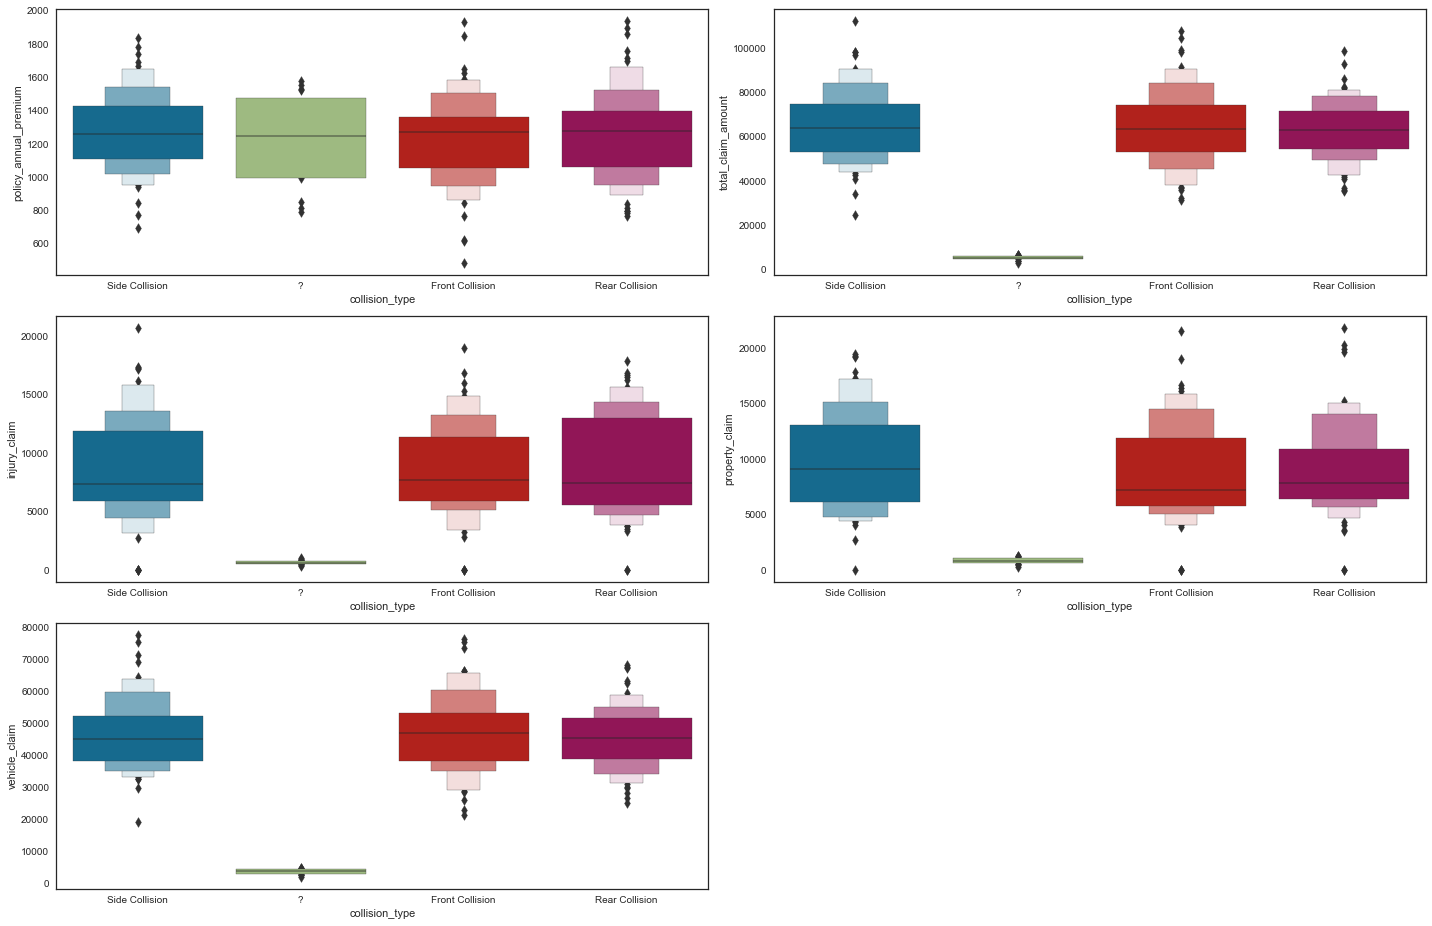

In [37]:
#Checking boxenplot for the feature columns in col3
df2=df.query("fraud_reported=='Y'")
col3=['policy_annual_premium','total_claim_amount','injury_claim','property_claim', 'vehicle_claim']

plt.figure(figsize=(20,85))
for i in range(len(col3)):
  plt.subplot(20,2,i+1)
  sns.boxenplot(x=df2['collision_type'],y=df2[col3[i]])
  plt.tight_layout()
  plt.xticks(rotation=90,fontsize=15)

Observations:

1. From plot 1, we see that people who have claimed fraud insurance they have policy_annual_premium whose min value is between 1300 and max value is approx 1800, and where collision type is ? people mostly have claimed 25% to 75%; and for front and rear collision type, people have claimed mostly 25% of the value.

2. From total_claim_amount vs Collision_type plot, we see that for side and front collision people have claimed maximum of 90000, and for front collision, the value is around 75000.

3. From injury_claim plot,  we see that wherever fraud is yes, side and rear collision have same max value of 15000 and min value of 700.

4. From property_claim plot, we see that wherever fraud is yes, side collision have 9000 as min value and 17000 as max values; and front and rear collision have min value as 6000 and max value as 11000; for side collision mostly people have claimed more than 50% of value which is same with Front and rear collision.

5. From vehicle_claim plot, wherever fraud is yes we can say that rear and side have almmost same min value, and front have a little different value.

6. In the above points, the values term that we used is the amount of money people have claimed; min value means the minimum amount of money people have claimed and max value reprenets the maximum amount of money that people have claimed in name of fraud.

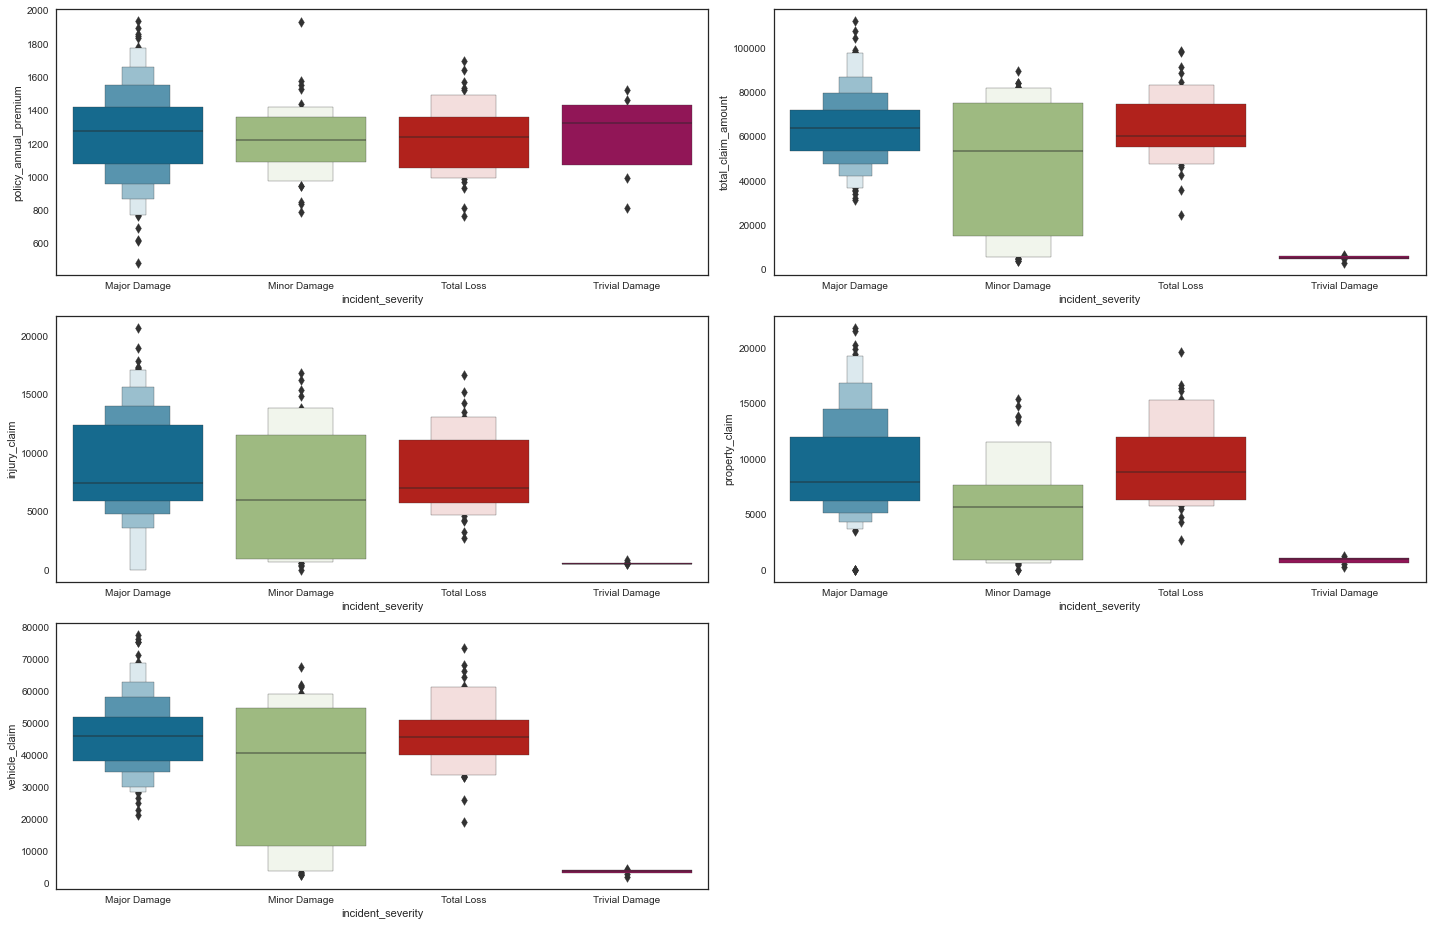

In [38]:
#checking boxenplot for incident_severity vs various amount claiming schemes
plt.figure(figsize=(20,85))
for i in range(len(col3)):
  plt.subplot(20,2,i+1)
  sns.boxenplot(x=df2['incident_severity'],y=df2[col3[i]])
  plt.tight_layout()

Observations:
    
1. From policy_annual_premium, we see that for minor damage mostly people claim value between 25-75%  though there are some outliers present who have claimed for min and max values; and for trivial damage, we see that mostly people have claim for values less than average.

2. From total_claim_amount plot, we see that for minor damage, mostly people have claimed value that is less than average which can be 25% of the value.

3. From injury_claim plot, we can see that for major damage people have claimed more than the mean value; for major damage, we see that mostly people have claimed 25% or 75% of value; and for total loss, mostly people have claimed more than mean value.

4. From property_claim plot, we see that for major damage the values mostly lies above mean i.e., for major damage people get more money and for minor damage people get value that is less than mean or average.

5. From vehicle_claim plot, we see that for minor damage people mostly get money that is less than mean and a very less no.of people get amount that is greater than mean value.

6. For trivial damage, we see that very less amount people get for all the factors.

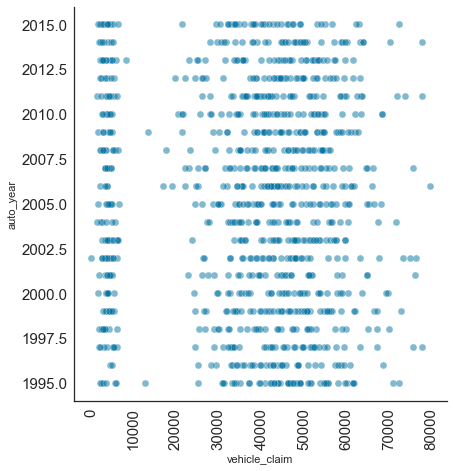

In [42]:
#Checking relplot for the feature columns in col4
col4=['total_claim_amount','injury_claim','property_claim','vehicle_claim']

sns.relplot(y='auto_year',x='vehicle_claim',data=df,alpha=.5,palette='muted',sizes=(40,400),height=6)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Observation: From the above plot, we see that as the years are increasing the vehicle_claim value is not increasing; it is almost same for all the years.

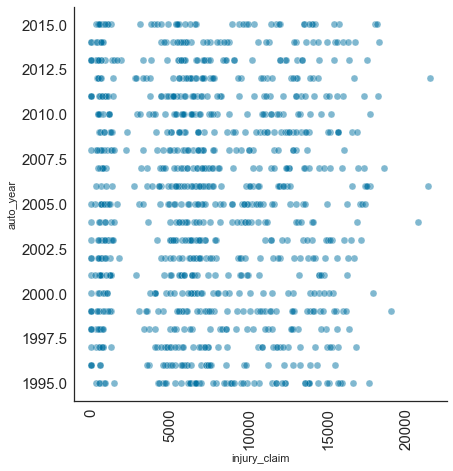

In [44]:
sns.relplot(y='auto_year',x='injury_claim',data=df,alpha=.5,palette='muted',sizes=(40,400),height=6)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Observation: From the above plot, we see that the injury_claim value is not increasing as the year are increasing. The values are almost same for all the years.

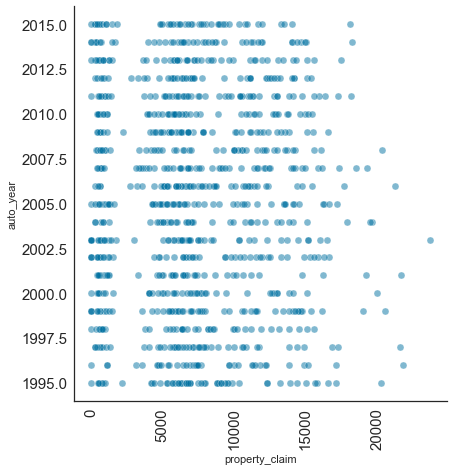

In [45]:
sns.relplot(y='auto_year',x='property_claim',data=df,alpha=.5,palette='muted',sizes=(40,400),height=6)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Observation: From the above plot, we see that the property_claim value is not increasing as the year are increasing. The values are almost same for all the years.

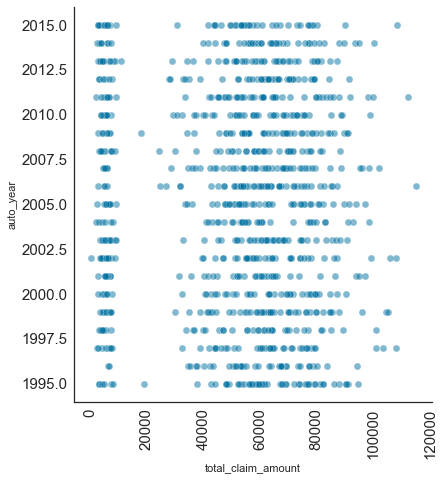

In [46]:
sns.relplot(y='auto_year',x='total_claim_amount',data=df,alpha=.5,palette='muted',sizes=(40,400),height=6)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Observation: From the above plot, we can see that Total claim amount value is almost same as the years increasing.

# Encoding the Categorical data:

In [88]:
#using ordinalencoder as all the column values are in order.
oe=OrdinalEncoder()
def ordinal_transform(df,col):
  df[col]=oe.fit_transform(df[col])
  return df

In [89]:
df=ordinal_transform(df,['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level','insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type','collision_type', 'incident_severity','authorities_contacted', 'incident_state', 'incident_city','property_damage', 'police_report_available','auto_make','auto_model', 'fraud_reported'])

# Splitting the data into dependent and independent variables:

In [90]:
def preprocess1(df):
  df=df.copy()
  X=df.drop(['fraud_reported'],axis=1)
  y=df['fraud_reported']
  return X,y

In [91]:
X,y=preprocess1(df)
x=X

# Multivariate Analysis:

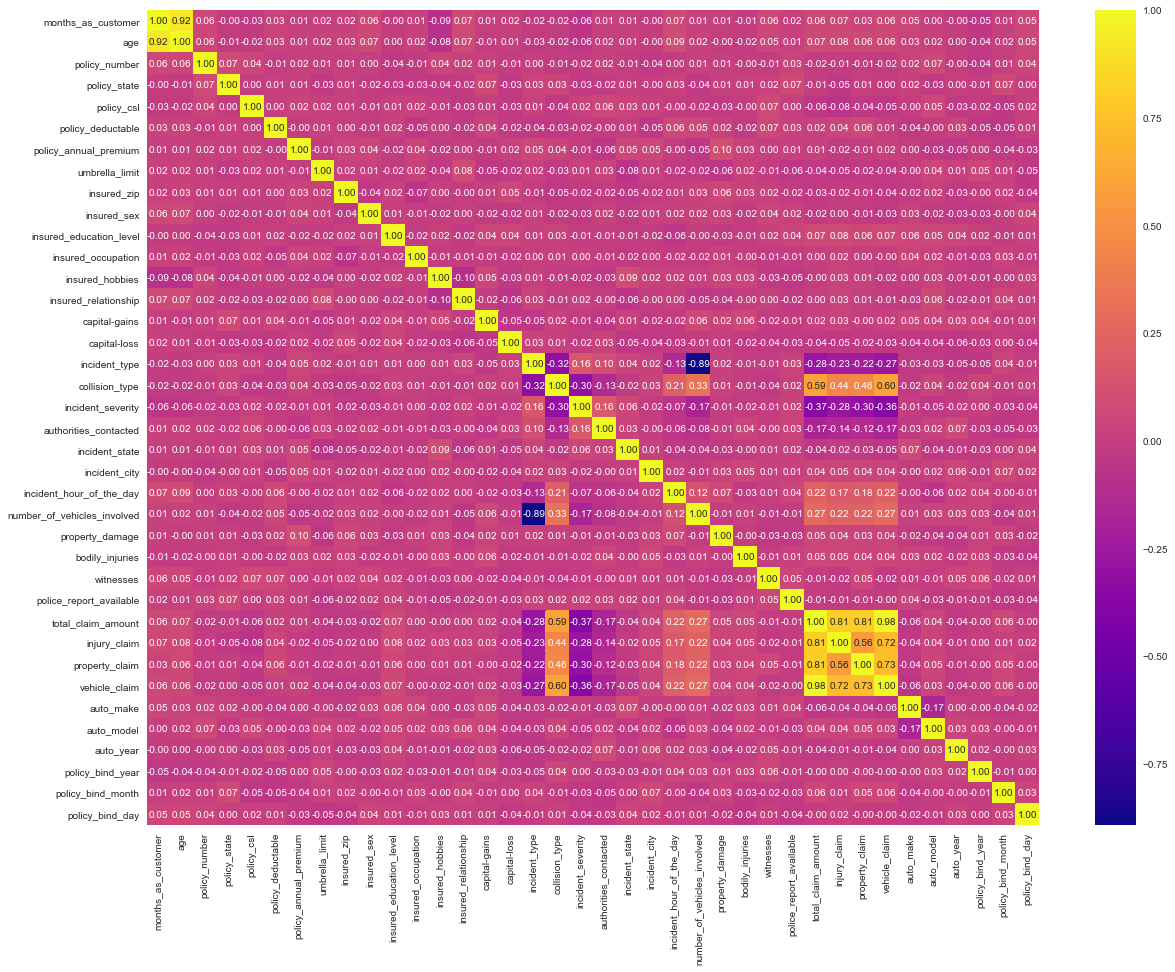

In [55]:
#Checking Correlation using heatmap
X_corr=X.corr()
plt.figure(figsize=(20,15))
sns.heatmap(X_corr,annot=True, cmap="plasma", fmt='0.2f')
plt.show()

Observation: In the above heatmap we are not being able to observe the correlation details clearly but still we can point out that there are few columns which are multicollinear. However they seem to add weightage in the model prediction, hence we would keep them.

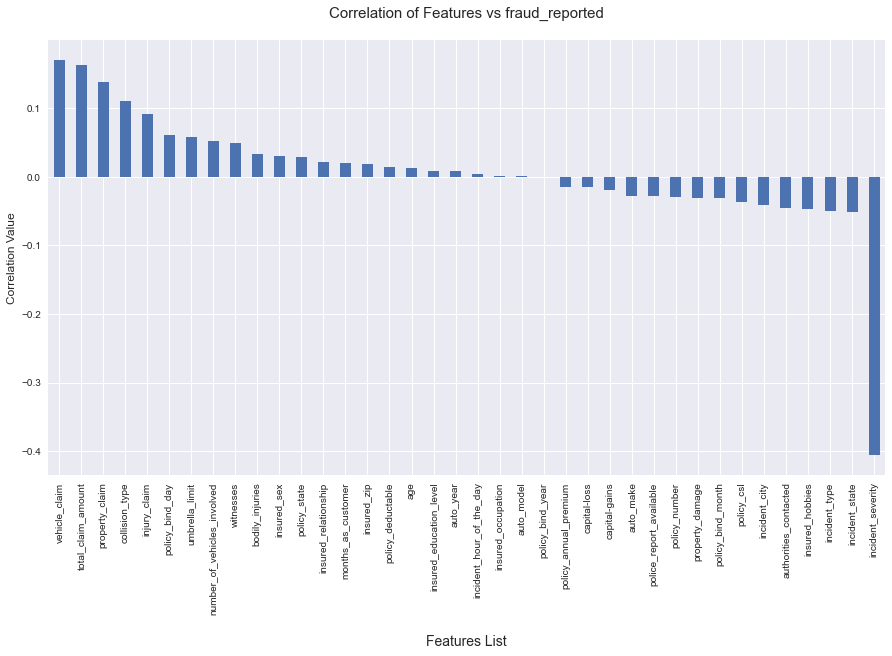

In [57]:
#using barplot to check correlation
plt.style.use('seaborn')
df_corr = df.corr()
plt.figure(figsize=(15,8))
df_corr['fraud_reported'].sort_values(ascending=False).drop('fraud_reported').plot.bar()
plt.title("Correlation of Features vs fraud_reported\n", fontsize=15)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Observation: Since the heatmap was not able to give us a clearer picture of positive and negative correlation columns so we have generated this bar plot. We see that more than half the feature columns are positively correlated with our target column while all the remaining features are negatively correlated which indicates that all the columns are required for the model prediction.

In [92]:
#dropping a column as it is not providing much information 
X.drop(['months_as_customer'],axis=1,inplace=True)
X

,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_year,policy_bind_month,policy_bind_day
0,48,521585,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,...,71610,6510,13020,52080,10.0,1.0,2004,2014,10,17
1,42,342868,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,...,5070,780,780,3510,8.0,12.0,2007,2006,6,27
2,29,687698,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,...,34650,7700,3850,23100,4.0,30.0,2007,2000,6,9
3,41,227811,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,...,63400,6340,6340,50720,3.0,34.0,2014,1990,5,25
4,44,367455,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,...,6500,1300,650,4550,0.0,31.0,2009,2014,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38,941851,2.0,2.0,1000,1310.80,0,431289,0.0,5.0,...,87200,17440,8720,61040,6.0,6.0,2006,1991,7,16
996,41,186934,0.0,0.0,1000,1436.79,0,608177,0.0,6.0,...,108480,18080,18080,72320,13.0,28.0,2015,2014,5,1
997,34,918516,2.0,1.0,500,1383.49,3000000,442797,0.0,5.0,...,67500,7500,7500,52500,11.0,19.0,1996,2003,2,17
998,62,533940,0.0,2.0,2000,1356.92,5000000,441714,1.0,0.0,...,46980,5220,5220,36540,1.0,5.0,1998,2011,11,18


# Checking Outliers:

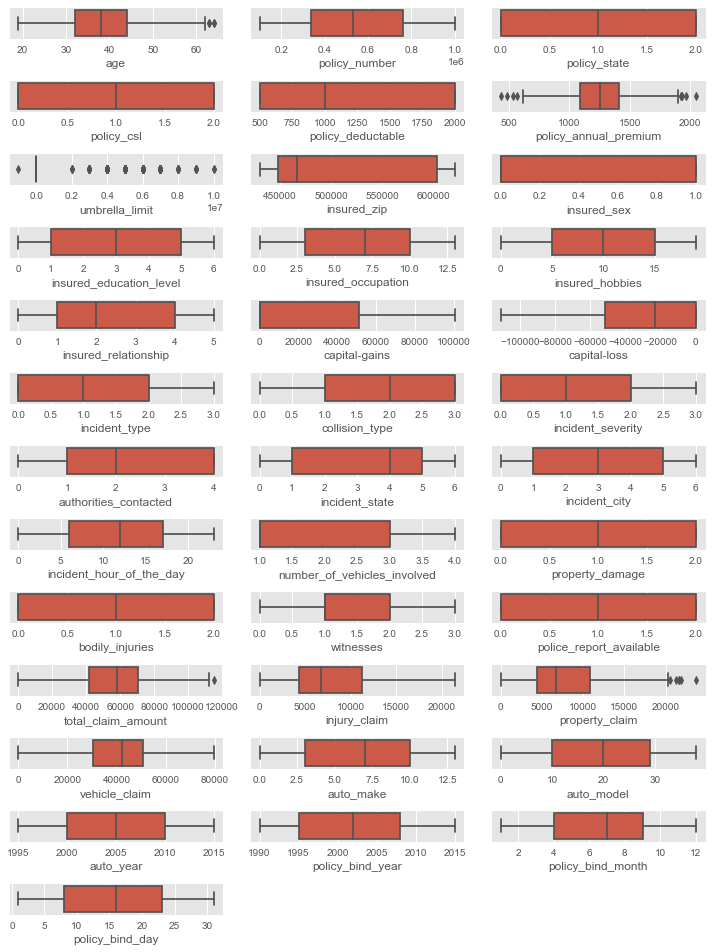

In [93]:
#plotting boxplots to check the outliers present in our dataset.
X_val=X.columns.values
plt.figure(figsize=(10,20))
for i in range(len(X_val)):
  plt.subplot(20,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()
  plt.style.use('ggplot')

Remarks: We can see that there is outliers present in our dataset.

# Removing Outliers:

In [94]:
#using percentile method to remove the outliers
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col]<=percentile[0]]=percentile[0]
  X[col][X[col]>=percentile[1]]=percentile[1]

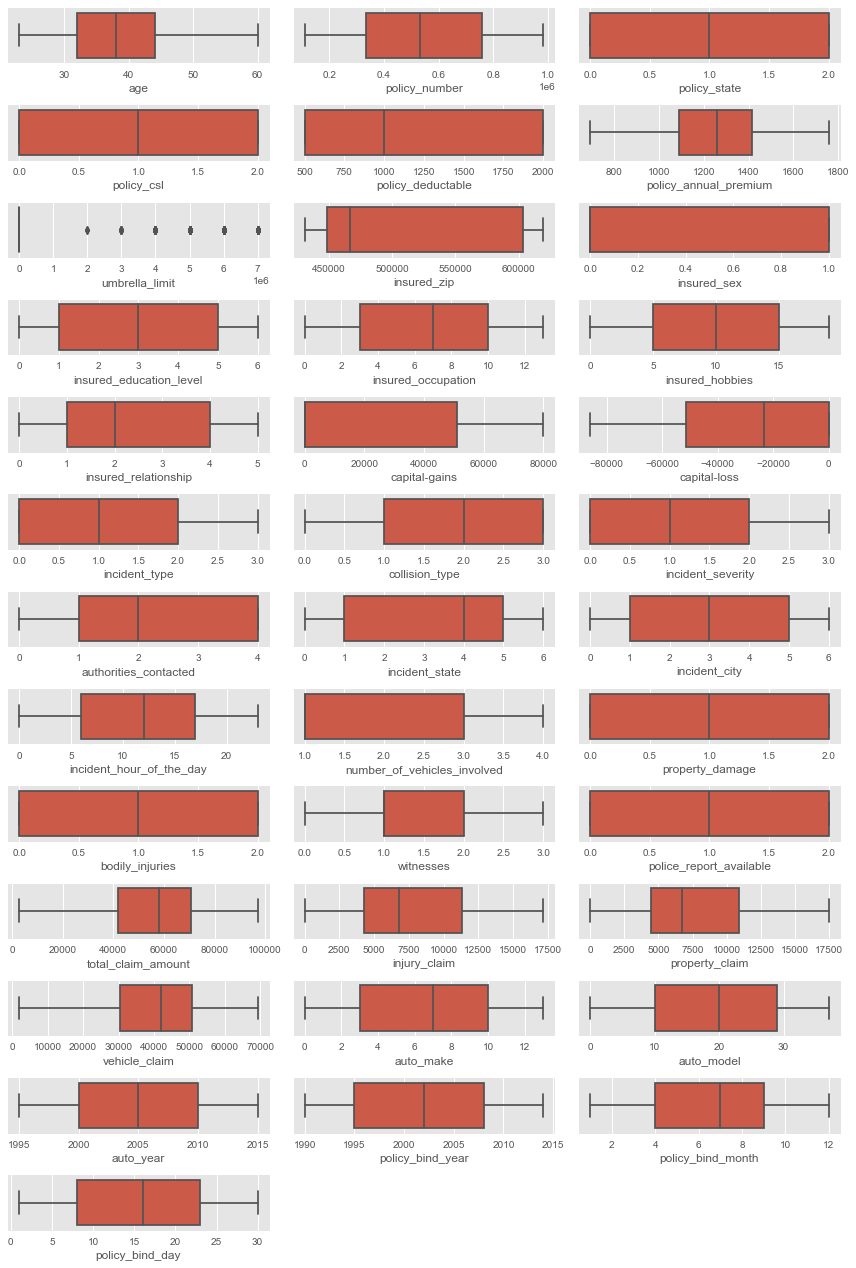

In [95]:
#checking outliers after removal
X_val=X.columns.values
plt.figure(figsize=(12,20))
for i in range(len(X_val)):
  plt.subplot(15,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

Remarks: we have successfully removed the outliers.

# Balancing the data:

In [96]:
def data_balancing(X,y):
  x=X
  smote=SMOTE(random_state=42)
  X_res,y_res=smote.fit_resample(X,y)
  X_new=pd.DataFrame(X_res,columns=x.columns)
  y_new=pd.DataFrame(y_res,columns=['fraud_reported'])
  return X_new,y_new

In [97]:
#our data is imbalanced so we have to balance it to build a better model
X_new,y_new=data_balancing(X,y)

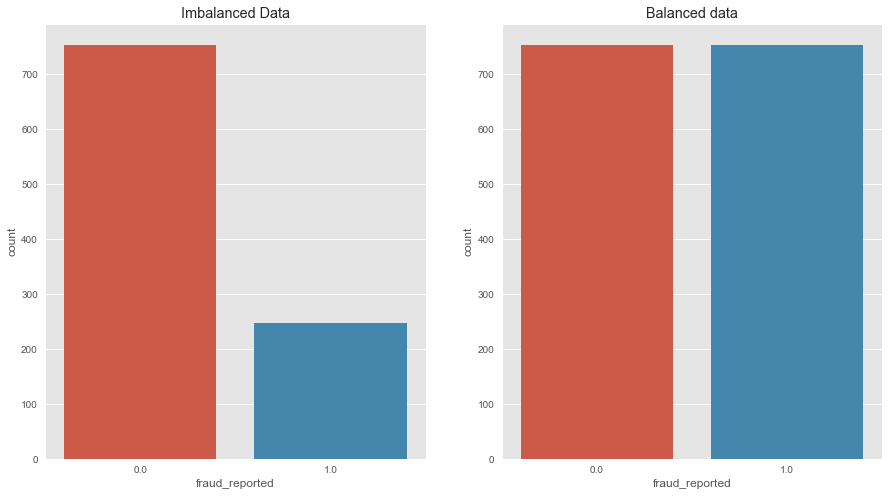

In [98]:
#visualizing the data after balancing it
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(df['fraud_reported'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(y_new['fraud_reported'])
plt.title("Balanced data")
plt.show()

# Checking skewness:

In [99]:
X.skew()

age                            0.461109
policy_number                  0.036105
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium         -0.046551
umbrella_limit                 1.712094
insured_zip                    0.816445
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.437885
capital-loss                  -0.366324
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777


Remarks: We see that there is no skewness in continuous columns and we don't need to remove skewness for categorical columns.

# Splitting data for model building using train test split:

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

# Training the models:

In [101]:
models={
    "Logistic Regression":LogisticRegression(),
    "DecisionTree Classifier":DecisionTreeClassifier(),
    "ExtraTrees Classifier":ExtraTreesClassifier(),
    "RandomForest Classifier":RandomForestClassifier(),
    "LGBM Classifier":LGBMClassifier(),
    "XGB Classifier":XGBClassifier()
}

# Finding the best model:

*************************************************** Logistic Regression ************************************************************


Accuracy_Score 0.5641592920353983


SCORE 0.5641592920353983


Confusion metrics


[[125  91]
 [106 130]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.54      0.58      0.56       216
         1.0       0.59      0.55      0.57       236

    accuracy                           0.56       452
   macro avg       0.56      0.56      0.56       452
weighted avg       0.57      0.56      0.56       452

Cross_Val_Score 0.5770170073265715


ROC AUC CURVE


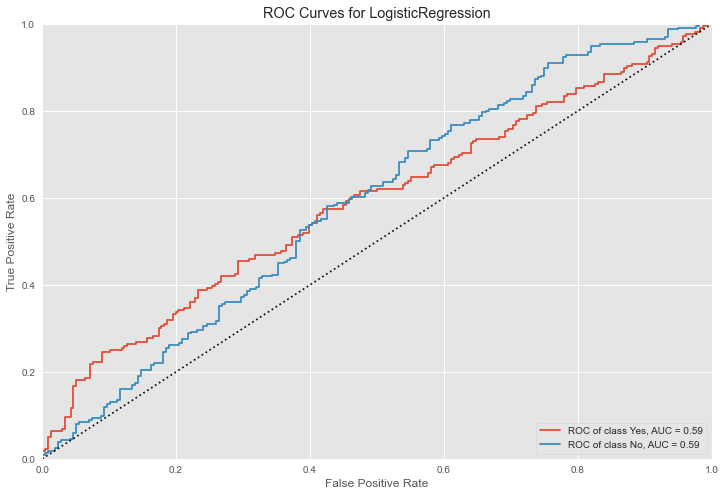

MODEL LEARNING CURVE


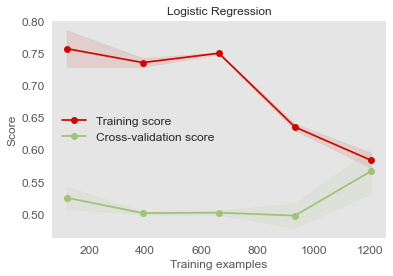

*************************************************** DecisionTree Classifier ************************************************************


Accuracy_Score 0.8097345132743363


SCORE 0.8097345132743363


Confusion metrics


[[172  44]
 [ 42 194]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       216
         1.0       0.82      0.82      0.82       236

    accuracy                           0.81       452
   macro avg       0.81      0.81      0.81       452
weighted avg       0.81      0.81      0.81       452

Cross_Val_Score 0.8333215990847286


ROC AUC CURVE


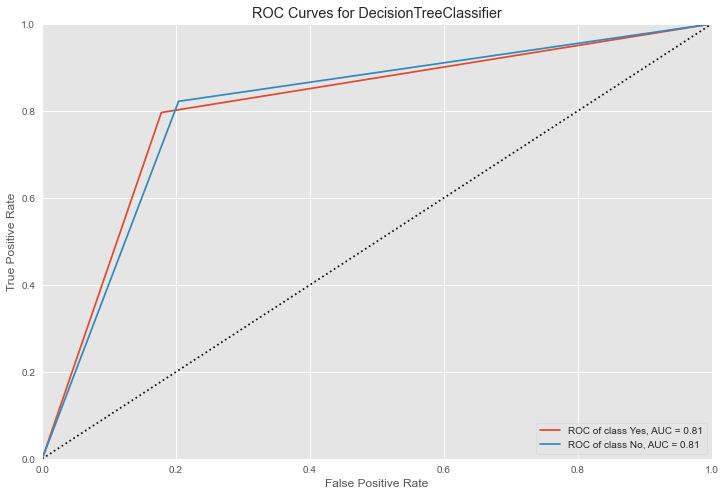

MODEL LEARNING CURVE


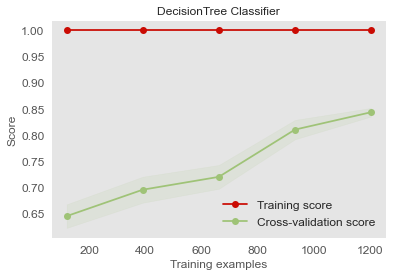

*************************************************** ExtraTrees Classifier ************************************************************


Accuracy_Score 0.8738938053097345


SCORE 0.8738938053097345


Confusion metrics


[[185  31]
 [ 26 210]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       216
         1.0       0.87      0.89      0.88       236

    accuracy                           0.87       452
   macro avg       0.87      0.87      0.87       452
weighted avg       0.87      0.87      0.87       452

Cross_Val_Score 0.8904336538249984


ROC AUC CURVE


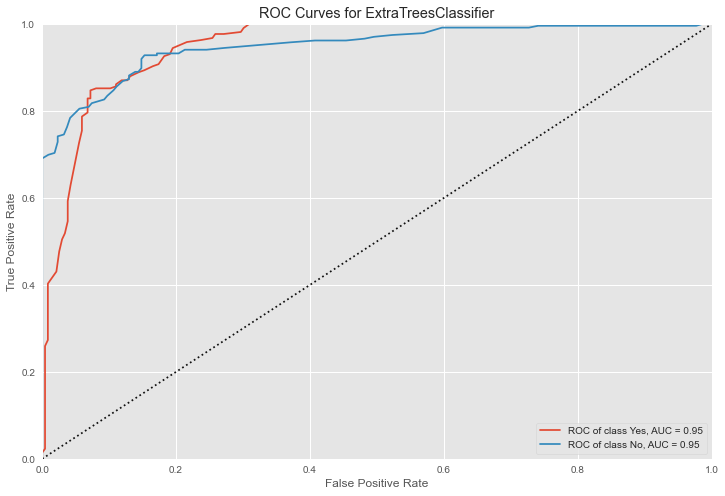

MODEL LEARNING CURVE


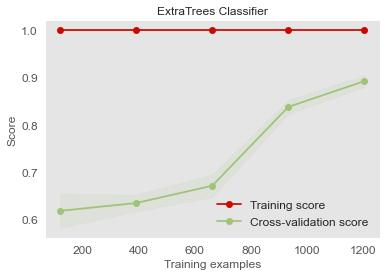

*************************************************** RandomForest Classifier ************************************************************


Accuracy_Score 0.8517699115044248


SCORE 0.8517699115044248


Confusion metrics


[[184  32]
 [ 35 201]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       216
         1.0       0.86      0.85      0.86       236

    accuracy                           0.85       452
   macro avg       0.85      0.85      0.85       452
weighted avg       0.85      0.85      0.85       452

Cross_Val_Score 0.8705287012386966


ROC AUC CURVE


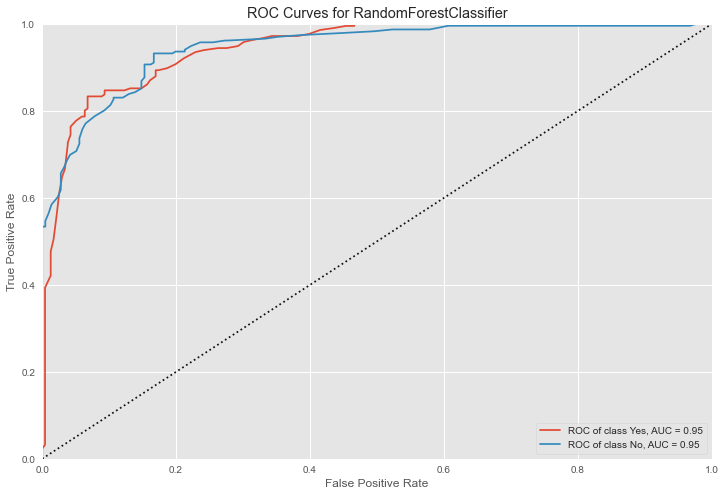

MODEL LEARNING CURVE


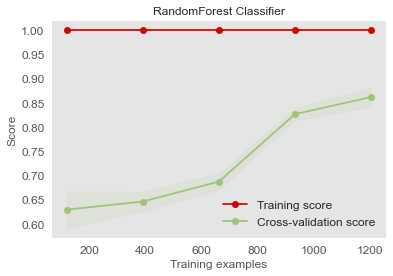

*************************************************** LGBM Classifier ************************************************************


Accuracy_Score 0.8805309734513275


SCORE 0.8805309734513275


Confusion metrics


[[183  33]
 [ 21 215]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.90      0.85      0.87       216
         1.0       0.87      0.91      0.89       236

    accuracy                           0.88       452
   macro avg       0.88      0.88      0.88       452
weighted avg       0.88      0.88      0.88       452

Cross_Val_Score 0.8877736463444148


ROC AUC CURVE


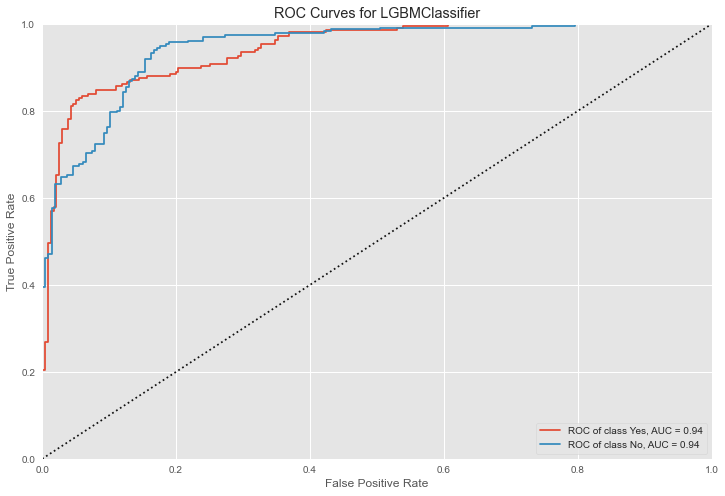

MODEL LEARNING CURVE


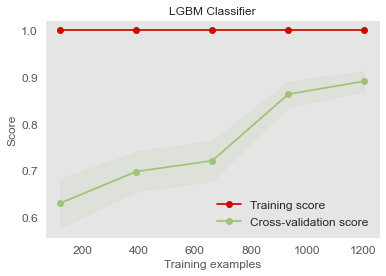

*************************************************** XGB Classifier ************************************************************
[23:26:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy_Score 0.8716814159292036


SCORE 0.8716814159292036


Confusion metrics


[[180  36]
 [ 22 214]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86       216
         1.0       0.86      0.91      0.88       236

    accuracy                           0.87       452
   macro avg       0.87      0.87      0.87       452
weighted avg       0.87      0.87      0.87       452

[23:26:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: S

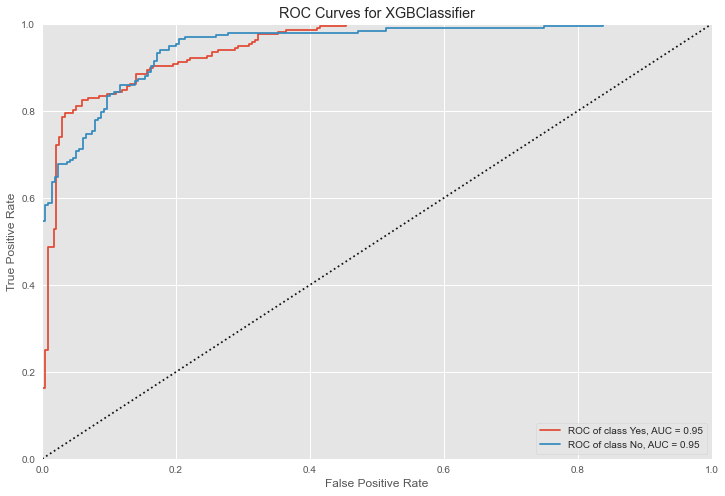

MODEL LEARNING CURVE
[23:26:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:55] WARNING: C:/Users/Administrator/worksp

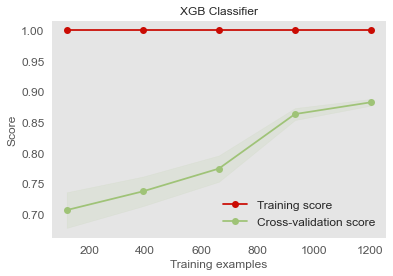

In [102]:
skf=StratifiedKFold(n_splits=5,shuffle=True)
Score=[]
CVS=[]
MODEL=[]
for name,model in models.items():
  print("***************************************************",name,"************************************************************")
  MODEL.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('\n')
  ac=accuracy_score(y_test,y_pred)
  Score.append(ac)
  print("Accuracy_Score",ac)
  print('\n')
  print("SCORE",model.score(X_test,y_test))
  print("\n")
  cm=confusion_matrix(y_test,y_pred)
  print('Confusion metrics')
  print('\n')
  print(cm)
  print("CLASSIFICATION REPORT")
  report=classification_report(y_test,y_pred)
  print('\n')
  print(report)
  csv=cross_val_score(model,X_new,y_new,cv=skf).mean()
  CVS.append(csv*100)
  print("Cross_Val_Score",csv)
  print('\n')
  print("ROC AUC CURVE")
  plt.figure(figsize=(12,8))
  roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['Yes','No'],micro=False,macro=False)
  print("MODEL LEARNING CURVE")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
  plt.show()

# Remarks:
We are selecting XGBClassifier as it is giving good metrics and cross_val_Score of 0.89.

# Hyperparameter tuning our best ML model:

In [103]:
XGB=XGBClassifier()
XGB.fit(X_train,y_train)

[23:27:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
XGB.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [105]:
params={
 'booster':['gbtree','dart'],
 'gamma': [0,1,2,3],
 'importance_type': ['gain','split'],
 'max_depth': [6,5,7],
 'n_estimators': [100,200,500],
}

Remarks: Listing down the chosen parameters above after selecting XGBClassifier as our best model.

In [106]:
Grid=GridSearchCV(estimator=XGB,param_grid=params,n_jobs=-1,cv=skf,scoring='accuracy')

Remarks: Using the Grid Search CV method for hyperparameter tuning of the best model.

In [107]:
Grid.fit(X_new,y_new)

[00:38:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monoton...)',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_me

Remarks: We have trained the Grid Search CV with the list of parameters we think it should check for best possible outcomes

In [108]:
Grid.best_params_

{'booster': 'gbtree',
 'gamma': 0,
 'importance_type': 'gain',
 'max_depth': 5,
 'n_estimators': 200}

Remarks: In ten above cell, the Grid Search CV has provided the best parameters list out of all the combinations it used to train the model.

In [109]:
Grid.best_score_

0.8990715275791512

Remarks: 
After successfully incorporating the HyperParameter Tuning on the final Model, we have received the accuracy score of 89.90%.

In [110]:
xgb=XGBClassifier(booster= 'gbtree',
 gamma= 1,
 importance_type= 'gain',
 max_depth= 6,
 n_estimators= 100)

In [111]:
xgb.fit(X_train,y_train)

[00:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Final Model ROC_AUC curve and Model Learning Curve:

ROC_AUC CURVE


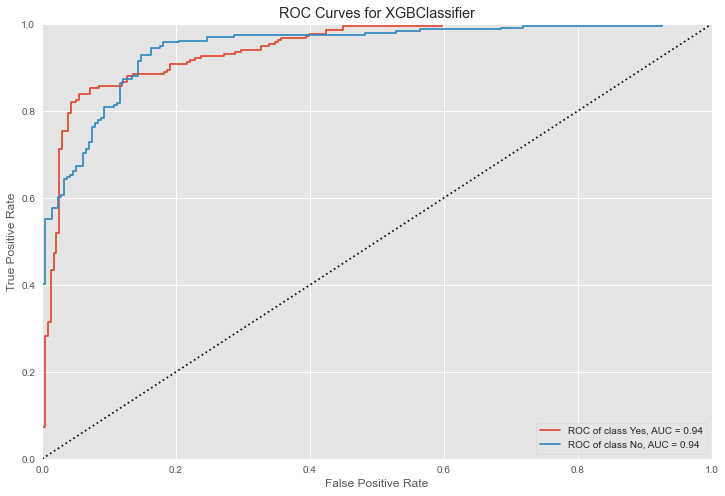

MODEL LEARNING CURVE
[00:43:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:43:37] WARNING: C:/Users/Administrator/worksp

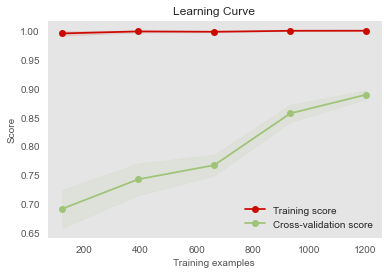

In [112]:
print("ROC_AUC CURVE")
plt.figure(figsize=(12,8))
roc_auc(xgb,X_train,y_train,X_test=X_test,y_test=y_test,classes=['Yes','No'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(xgb,X_new,y_new,cv=skf,scoring='accuracy')
plt.show()

Remarks: We have generated the ROC Curve for our final model and it shows the AUC score for our final model to be of 94%.

# Final model metrics:

In [114]:
Y_Pred=xgb.predict(X_test)
print("Accuracy_score",accuracy_score(y_test,Y_Pred))
print("CVS",cross_val_score(xgb,X_new,y_new,scoring='accuracy',cv=skf).mean())
print("Confusion matrix")
print('\n')
print(confusion_matrix(y_test,Y_Pred))
print('\n')
print("Classification Report")
print("\n")
print(classification_report(y_test,Y_Pred))

Accuracy_score 0.8915929203539823
[00:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:21] WARNING: C:/Users/Adminis

# Saving the model:

In [115]:
joblib.dump(Grid,"Insurance_Fraud.obj")

['Insurance_Fraud.obj']

# Loading the model:

In [116]:
model=joblib.load('Insurance_Fraud.obj')

In [117]:
model.predict(X_test)

array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0.

# Conclusion:

1. In this dataset, we were asked to predict if an insurance claim made by customer is fraud or not making 'fraud_reported' as our target column.


2. We analyzed the dataset thoroughly  and then we performed EDA to understand the effect of features on our target label.


3. We noted down all the observations that we made from the data visualization of the feature and target columns.


4. We found the type of people who are doing fraud, the level of education they have, whether they have children or not and many other things.


5. There are imbalanced data in our datset which we balanced using SMOTE technique.


6. We have performed all the steps of data science life cycle in this project i.e., data pre-processing, data cleaning, Feature Engineering, Feature selection, Feature Transformation and then Model Building.


7. We performed model buildling using many models and we found that XGBClassifier was giving good matrix so we selected this model and performed hyperparameter tuning to increase the accuracy. At the end, we have build a model with 89.90 % accuracy.


8. Finally, we saved the model for future prediction.